# Financial Data - Advanced Analysis Techniques

## Importing Financial Data from Excel

Before you can move on with the next Lectures on Importing Data from Excel with pd.read_excel() you may need to import xlrd with the following command (to be entered into __Anaconda Prompt__ / __Terminal Window__):

conda install xlrd

In [1]:
import pandas as pd

In [4]:
pd.read_excel("data/SP500.xls").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12107 non-null  datetime64[ns]
 1   Open       12107 non-null  float64       
 2   High       12107 non-null  float64       
 3   Low        12107 non-null  float64       
 4   Close      12107 non-null  float64       
 5   Adj Close  12107 non-null  float64       
 6   Volume     12107 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 662.2 KB


In [5]:
pd.read_excel("data/SP500.xls", parse_dates= ["Date"], index_col = "Date")

Open         High          Low        Close    Adj Close  \
Date                                                                          
1970-12-31    92.269997    92.790001    91.360001    92.150002    92.150002   
1971-01-04    92.150002    92.190002    90.639999    91.150002    91.150002   
1971-01-05    91.150002    92.279999    90.690002    91.800003    91.800003   
1971-01-06    91.800003    93.000000    91.500000    92.349998    92.349998   
1971-01-07    92.349998    93.260002    91.750000    92.379997    92.379997   
...                 ...          ...          ...          ...          ...   
2018-12-21  2465.379883  2504.409912  2408.550049  2416.620117  2416.620117   
2018-12-24  2400.560059  2410.340088  2351.100098  2351.100098  2351.100098   
2018-12-26  2363.120117  2467.760010  2346.580078  2467.699951  2467.699951   
2018-12-27  2442.500000  2489.100098  2397.939941  2488.830078  2488.830078   
2018-12-28  2498.770020  2520.270020  2472.889893  2485.739990  2485.739990   

                Volume  
Date                    
1970-12-31    13390000  
1971-01-04    10010000  
1971-01-05    12600000  
1971-01-06    16960000  
1971-01-07    16460000  
...                ...  
2018-12-21  -980924592  
2018-12-24 -1681037296  
2018-12-26   -60977296  
2018-12-27  -198357296  
2018-12-28  -592347296  

[12107 rows x 6 columns]

In [6]:
pd.read_excel("data/SP500.xls", parse_dates= ["Date"], index_col = "Date", usecols = "A, C:E")

High          Low        Close
Date                                             
1970-12-31    92.790001    91.360001    92.150002
1971-01-04    92.190002    90.639999    91.150002
1971-01-05    92.279999    90.690002    91.800003
1971-01-06    93.000000    91.500000    92.349998
1971-01-07    93.260002    91.750000    92.379997
...                 ...          ...          ...
2018-12-21  2504.409912  2408.550049  2416.620117
2018-12-24  2410.340088  2351.100098  2351.100098
2018-12-26  2467.760010  2346.580078  2467.699951
2018-12-27  2489.100098  2397.939941  2488.830078
2018-12-28  2520.270020  2472.889893  2485.739990

[12107 rows x 3 columns]

In [7]:
pd.read_excel("data/SP500.xls", sheet_name= "Sales")

Unnamed: 0      City  Sales
0       Mike  New York     25
1        Jim    Boston     43
2     Steven    London     76
3        Joe    Madrid     12
4        Tom     Paris     89

In [8]:
SP500 = pd.read_excel("data/SP500.xls", parse_dates= ["Date"], index_col = "Date", usecols= "A:E")

In [9]:
SP500.head()

Open       High        Low      Close
Date                                                  
1970-12-31  92.269997  92.790001  91.360001  92.150002
1971-01-04  92.150002  92.190002  90.639999  91.150002
1971-01-05  91.150002  92.279999  90.690002  91.800003
1971-01-06  91.800003  93.000000  91.500000  92.349998
1971-01-07  92.349998  93.260002  91.750000  92.379997

In [10]:
SP500.tail()

Open         High          Low        Close
Date                                                          
2018-12-21  2465.379883  2504.409912  2408.550049  2416.620117
2018-12-24  2400.560059  2410.340088  2351.100098  2351.100098
2018-12-26  2363.120117  2467.760010  2346.580078  2467.699951
2018-12-27  2442.500000  2489.100098  2397.939941  2488.830078
2018-12-28  2498.770020  2520.270020  2472.889893  2485.739990

In [11]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12107 non-null  float64
 1   High    12107 non-null  float64
 2   Low     12107 non-null  float64
 3   Close   12107 non-null  float64
dtypes: float64(4)
memory usage: 472.9 KB


In [12]:
SP500.to_csv("data/SP500.csv")

In [ ]:
#SP500.to_excel("SP500_red.xls") #old

In [16]:
SP500.to_excel("data/SP500_red.xlsx") #new

## Simple Moving Averages (SMA) with rolling()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [18]:
SP500 = pd.read_csv("data/SP500.csv", parse_dates = ["Date"], index_col = "Date")

In [19]:
SP500.head()

Open       High        Low      Close
Date                                                  
1970-12-31  92.269997  92.790001  91.360001  92.150002
1971-01-04  92.150002  92.190002  90.639999  91.150002
1971-01-05  91.150002  92.279999  90.690002  91.800003
1971-01-06  91.800003  93.000000  91.500000  92.349998
1971-01-07  92.349998  93.260002  91.750000  92.379997

In [20]:
SP500.tail()

Open         High          Low        Close
Date                                                          
2018-12-21  2465.379883  2504.409912  2408.550049  2416.620117
2018-12-24  2400.560059  2410.340088  2351.100098  2351.100098
2018-12-26  2363.120117  2467.760010  2346.580078  2467.699951
2018-12-27  2442.500000  2489.100098  2397.939941  2488.830078
2018-12-28  2498.770020  2520.270020  2472.889893  2485.739990

In [21]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12107 non-null  float64
 1   High    12107 non-null  float64
 2   Low     12107 non-null  float64
 3   Close   12107 non-null  float64
dtypes: float64(4)
memory usage: 472.9 KB


In [22]:
SP500 = SP500.Close.to_frame()

In [23]:
SP500.head()

Close
Date                 
1970-12-31  92.150002
1971-01-04  91.150002
1971-01-05  91.800003
1971-01-06  92.349998
1971-01-07  92.379997

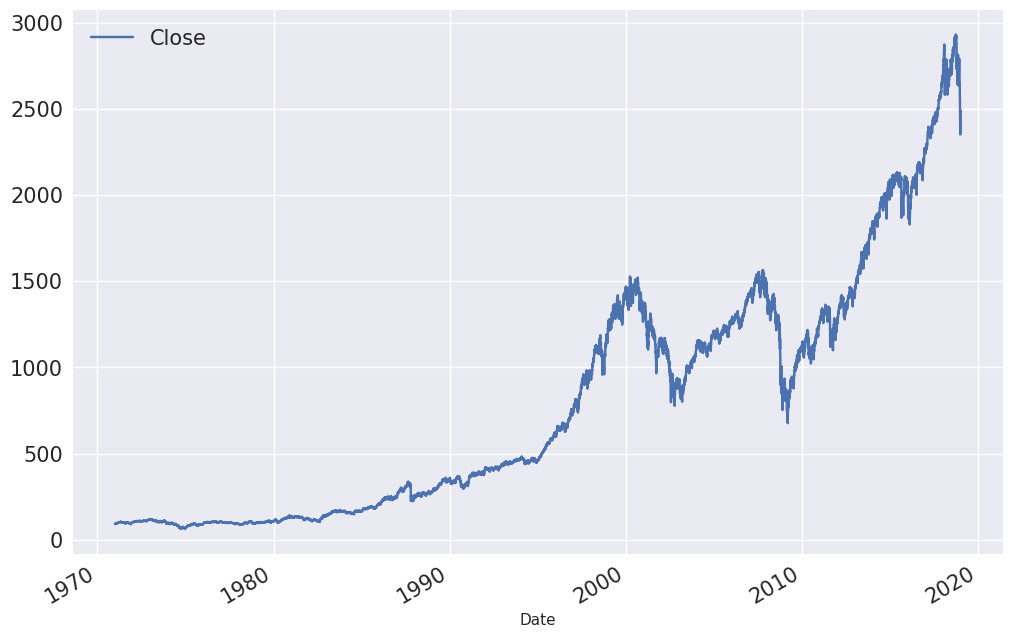

In [24]:
SP500.plot(figsize = (12,8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [25]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [26]:
SP500.rolling(window = 10)

Rolling [window=10,center=False,axis=0,method=single]

In [27]:
type(SP500.rolling(window = 10))

pandas.core.window.rolling.Rolling

In [28]:
SP500.head(15)

Close
Date                  
2008-12-31  903.250000
2009-01-02  931.799988
2009-01-05  927.450012
2009-01-06  934.700012
2009-01-07  906.650024
2009-01-08  909.729980
2009-01-09  890.349976
2009-01-12  870.260010
2009-01-13  871.789978
2009-01-14  842.619995
2009-01-15  843.739990
2009-01-16  850.119995
2009-01-20  805.219971
2009-01-21  840.239990
2009-01-22  827.500000

In [29]:
SP500.rolling(window = 10).mean()

Close
Date                   
2008-12-31          NaN
2009-01-02          NaN
2009-01-05          NaN
2009-01-06          NaN
2009-01-07          NaN
...                 ...
2018-12-21  2565.915991
2018-12-24  2537.254004
2018-12-26  2520.345996
2018-12-27  2504.121997
2018-12-28  2487.641992

[2516 rows x 1 columns]

In [30]:
SP500.rolling(window = 10).mean()

Close
Date                   
2008-12-31          NaN
2009-01-02          NaN
2009-01-05          NaN
2009-01-06          NaN
2009-01-07          NaN
...                 ...
2018-12-21  2565.915991
2018-12-24  2537.254004
2018-12-26  2520.345996
2018-12-27  2504.121997
2018-12-28  2487.641992

[2516 rows x 1 columns]

In [31]:
SP500.rolling(window = 10, min_periods=5).mean()

Close
Date                   
2008-12-31          NaN
2009-01-02          NaN
2009-01-05          NaN
2009-01-06          NaN
2009-01-07   920.770007
...                 ...
2018-12-21  2565.915991
2018-12-24  2537.254004
2018-12-26  2520.345996
2018-12-27  2504.121997
2018-12-28  2487.641992

[2516 rows x 1 columns]

In [32]:
SP500.tail(10)

Close
Date                   
2018-12-14  2599.949951
2018-12-17  2545.939941
2018-12-18  2546.159912
2018-12-19  2506.959961
2018-12-20  2467.419922
2018-12-21  2416.620117
2018-12-24  2351.100098
2018-12-26  2467.699951
2018-12-27  2488.830078
2018-12-28  2485.739990

## Momentum Trading Strategies with SMAs

In [33]:
SP500.head()

Close
Date                  
2008-12-31  903.250000
2009-01-02  931.799988
2009-01-05  927.450012
2009-01-06  934.700012
2009-01-07  906.650024

In [34]:
SP500.tail()

Close
Date                   
2018-12-21  2416.620117
2018-12-24  2351.100098
2018-12-26  2467.699951
2018-12-27  2488.830078
2018-12-28  2485.739990

In [35]:
SP500["SMA50"] = SP500.rolling(window = 50, min_periods=50).mean()

In [36]:
SP500

Close        SMA50
Date                                
2008-12-31   903.250000          NaN
2009-01-02   931.799988          NaN
2009-01-05   927.450012          NaN
2009-01-06   934.700012          NaN
2009-01-07   906.650024          NaN
...                 ...          ...
2018-12-21  2416.620117  2692.420195
2018-12-24  2351.100098  2684.874795
2018-12-26  2467.699951  2678.886196
2018-12-27  2488.830078  2673.646997
2018-12-28  2485.739990  2667.163398

[2516 rows x 2 columns]

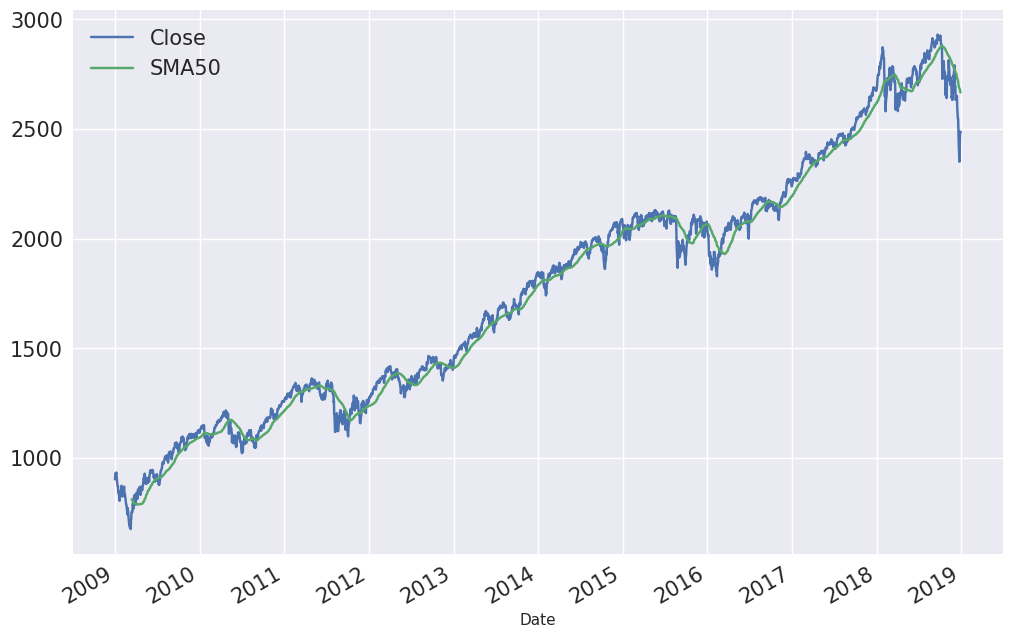

In [37]:
SP500.plot(figsize = (12, 8), fontsize = 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [38]:
SP500["SMA200"] = SP500.Close.rolling(window = 200).mean()

In [39]:
SP500.tail()

Close        SMA50      SMA200
Date                                            
2018-12-21  2416.620117  2692.420195  2753.65980
2018-12-24  2351.100098  2684.874795  2751.48245
2018-12-26  2467.699951  2678.886196  2749.90585
2018-12-27  2488.830078  2673.646997  2748.52345
2018-12-28  2485.739990  2667.163398  2747.20475

In [40]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2008-12-31 to 2018-12-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2516 non-null   float64
 1   SMA50   2467 non-null   float64
 2   SMA200  2317 non-null   float64
dtypes: float64(3)
memory usage: 78.6 KB


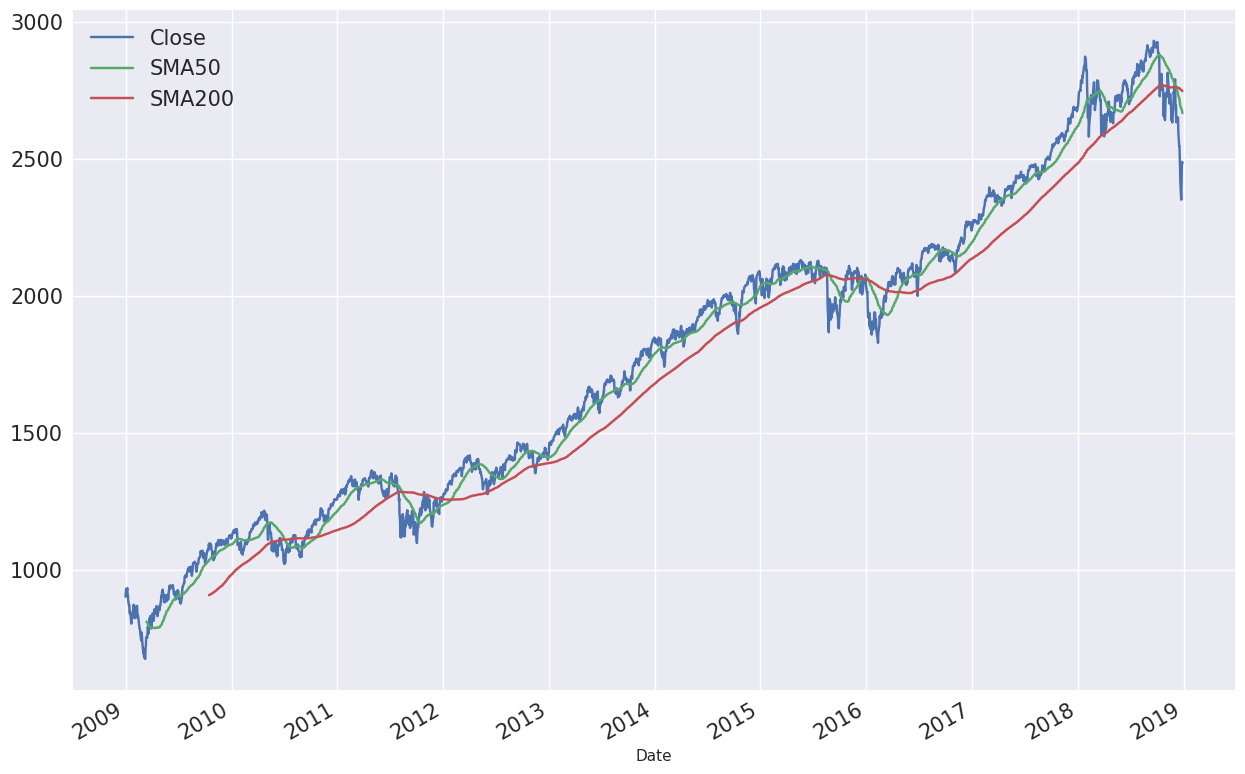

In [41]:
SP500.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

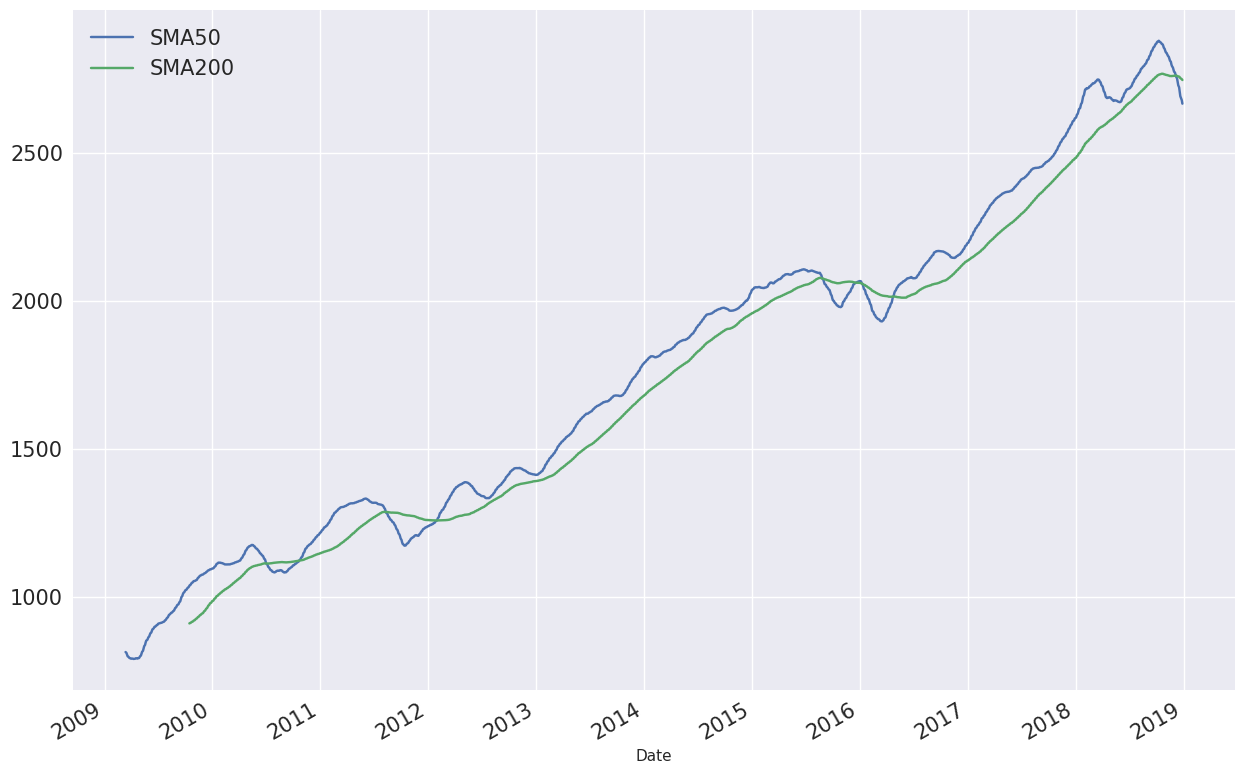

In [42]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

## Performance Reporting with rolling()

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [45]:
SP500 = pd.read_csv("data/SP500.csv", parse_dates= ["Date"], index_col = "Date", 
                    usecols= ["Date", "Close"])

In [46]:
SP500.head()

Close
Date                 
1970-12-31  92.150002
1971-01-04  91.150002
1971-01-05  91.800003
1971-01-06  92.349998
1971-01-07  92.379997

In [48]:
SP500.resample("ME", kind = "period").last()

/tmp/ipykernel_245409/3367896348.py:1: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  SP500.resample("ME", kind = "period").last()


Close
Date                
1970-12    92.150002
1971-01    95.879997
1971-02    96.750000
1971-03   100.309998
1971-04   103.949997
...              ...
2018-08  2901.520020
2018-09  2913.979980
2018-10  2711.739990
2018-11  2760.169922
2018-12  2485.739990

[577 rows x 1 columns]

In [49]:
month_ret = SP500.resample("ME", kind = "period").last().pct_change().dropna()

/tmp/ipykernel_245409/1844070419.py:1: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  month_ret = SP500.resample("ME", kind = "period").last().pct_change().dropna()


In [50]:
month_ret

Close
Date             
1971-01  0.040477
1971-02  0.009074
1971-03  0.036796
1971-04  0.036287
1971-05 -0.041558
...           ...
2018-08  0.030263
2018-09  0.004294
2018-10 -0.069403
2018-11  0.017859
2018-12 -0.099425

[576 rows x 1 columns]

In [51]:
month_ret.rolling(36).mean()*12

Close
Date             
1971-01       NaN
1971-02       NaN
1971-03       NaN
1971-04       NaN
1971-05       NaN
...           ...
2018-08  0.133653
2018-09  0.143899
2018-10  0.093103
2018-11  0.098888
2018-12  0.071590

[576 rows x 1 columns]

In [52]:
month_ret["Return"] = month_ret.rolling(36).mean()*12

In [53]:
month_ret.Close.rolling(36).std()*np.sqrt(12)

Date
1971-01         NaN
1971-02         NaN
1971-03         NaN
1971-04         NaN
1971-05         NaN
             ...   
2018-08    0.094305
2018-09    0.091740
2018-10    0.093480
2018-11    0.093556
2018-12    0.111514
Freq: M, Name: Close, Length: 576, dtype: float64

In [54]:
month_ret["Risk"] = month_ret.Close.rolling(36).std()*np.sqrt(12)

In [55]:
month_ret.dropna(inplace= True)

In [56]:
month_ret.head()

Close    Return      Risk
Date                                 
1973-12  0.016569  0.026493  0.123219
1974-01 -0.010046  0.009652  0.121276
1974-02 -0.003624  0.005419  0.121201
1974-03 -0.023280 -0.014606  0.119981
1974-04 -0.039051 -0.039719  0.119791

In [57]:
month_ret.tail()

Close    Return      Risk
Date                                 
2018-08  0.030263  0.133653  0.094305
2018-09  0.004294  0.143899  0.091740
2018-10 -0.069403  0.093103  0.093480
2018-11  0.017859  0.098888  0.093556
2018-12 -0.099425  0.071590  0.111514

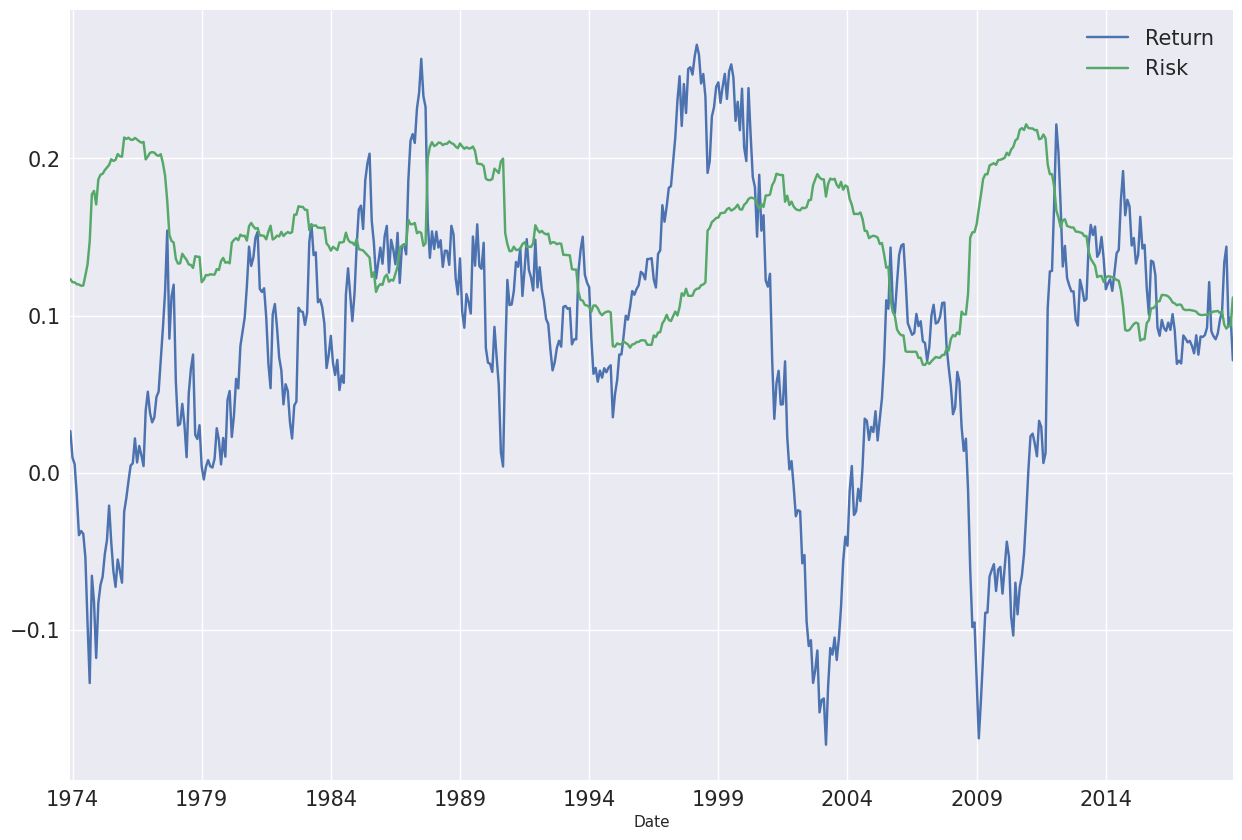

In [58]:
month_ret.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

In [59]:
month_ret.iloc[:,-2:].corr()

Return      Risk
Return  1.000000 -0.327747
Risk   -0.327747  1.000000

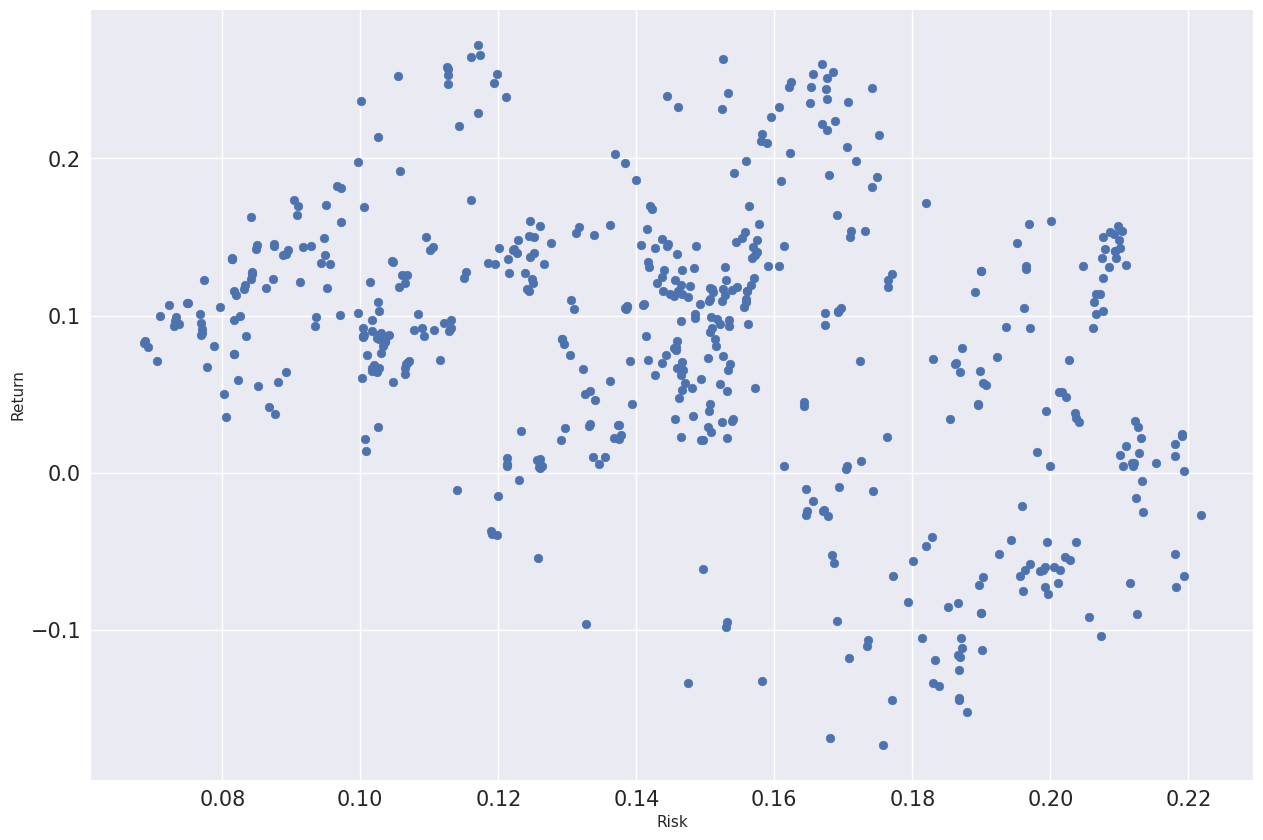

In [60]:
month_ret.iloc[:,-2:].plot(kind = "scatter", x = "Risk", y = "Return", figsize = (15,10), fontsize= 15, s = 40)
plt.show()

## Performance and Investment Periods / Time Diversification

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [63]:
SP500 = pd.read_csv("data/SP500.csv", parse_dates= ["Date"], index_col = "Date",
                    usecols = ["Date", "Close"])

In [64]:
SP500.head()

Close
Date                 
1970-12-31  92.150002
1971-01-04  91.150002
1971-01-05  91.800003
1971-01-06  92.349998
1971-01-07  92.379997

In [65]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   12107 non-null  float64
dtypes: float64(1)
memory usage: 189.2 KB


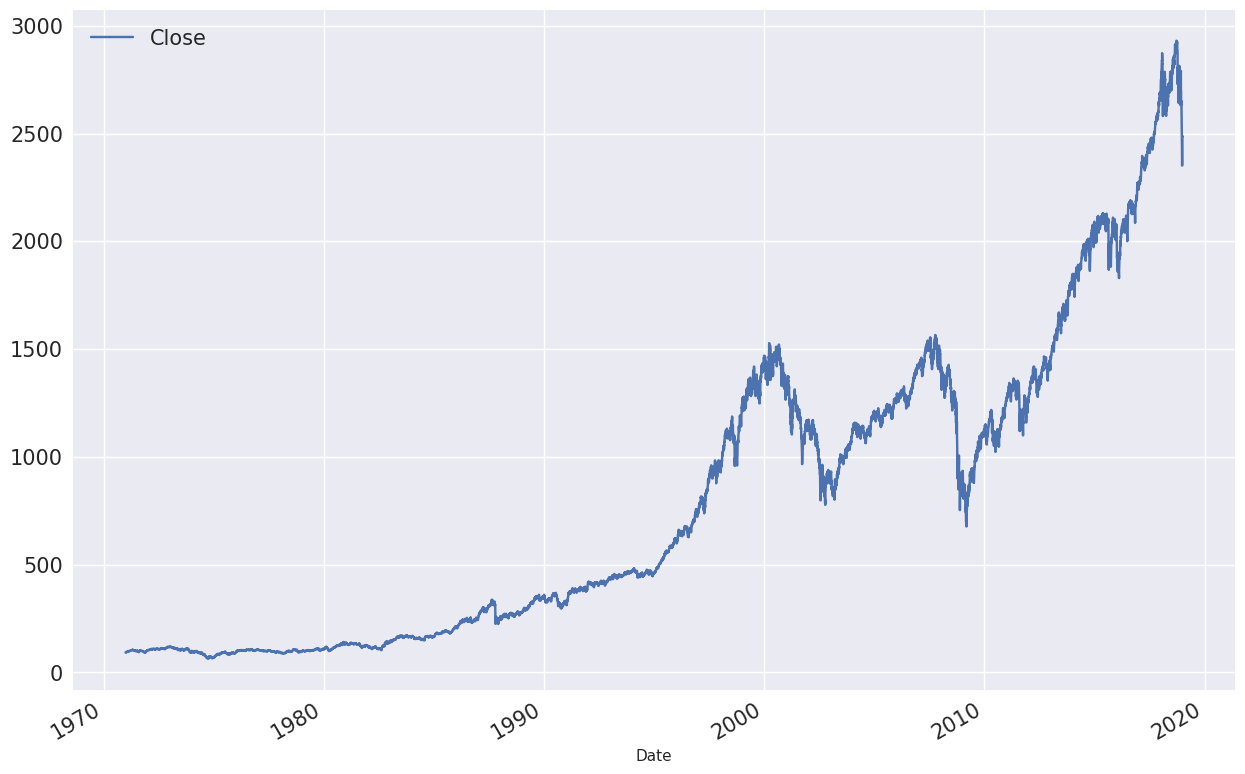

In [66]:
SP500.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

In [67]:
month_ret = SP500.resample("M", kind = "period").last().pct_change().dropna()

/tmp/ipykernel_245409/1980853421.py:1: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  month_ret = SP500.resample("M", kind = "period").last().pct_change().dropna()
/tmp/ipykernel_245409/1980853421.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_ret = SP500.resample("M", kind = "period").last().pct_change().dropna()


In [68]:
month_ret.tail()

Close
Date             
2018-08  0.030263
2018-09  0.004294
2018-10 -0.069403
2018-11  0.017859
2018-12 -0.099425

In [69]:
month_ret.columns = ["m_returns"]

In [70]:
month_ret.rolling(3 * 12).mean()*12

m_returns
Date              
1971-01        NaN
1971-02        NaN
1971-03        NaN
1971-04        NaN
1971-05        NaN
...            ...
2018-08   0.133653
2018-09   0.143899
2018-10   0.093103
2018-11   0.098888
2018-12   0.071590

[576 rows x 1 columns]

In [71]:
for years in [1, 3, 5, 10, 20]:
    month_ret["{}Y".format(years)] = month_ret.m_returns.rolling(years*12).mean()*12

In [72]:
month_ret.tail()

m_returns        1Y        3Y        5Y       10Y       20Y
Date                                                                
2018-08   0.030263  0.165207  0.133653  0.119980  0.092904  0.066120
2018-09   0.004294  0.150198  0.143899  0.114889  0.102412  0.063215
2018-10  -0.069403  0.058606  0.093103  0.092089  0.112415  0.055730
2018-11   0.017859  0.048383  0.098888  0.090051  0.121685  0.053667
2018-12  -0.099425 -0.060874  0.071590  0.065453  0.110961  0.045877

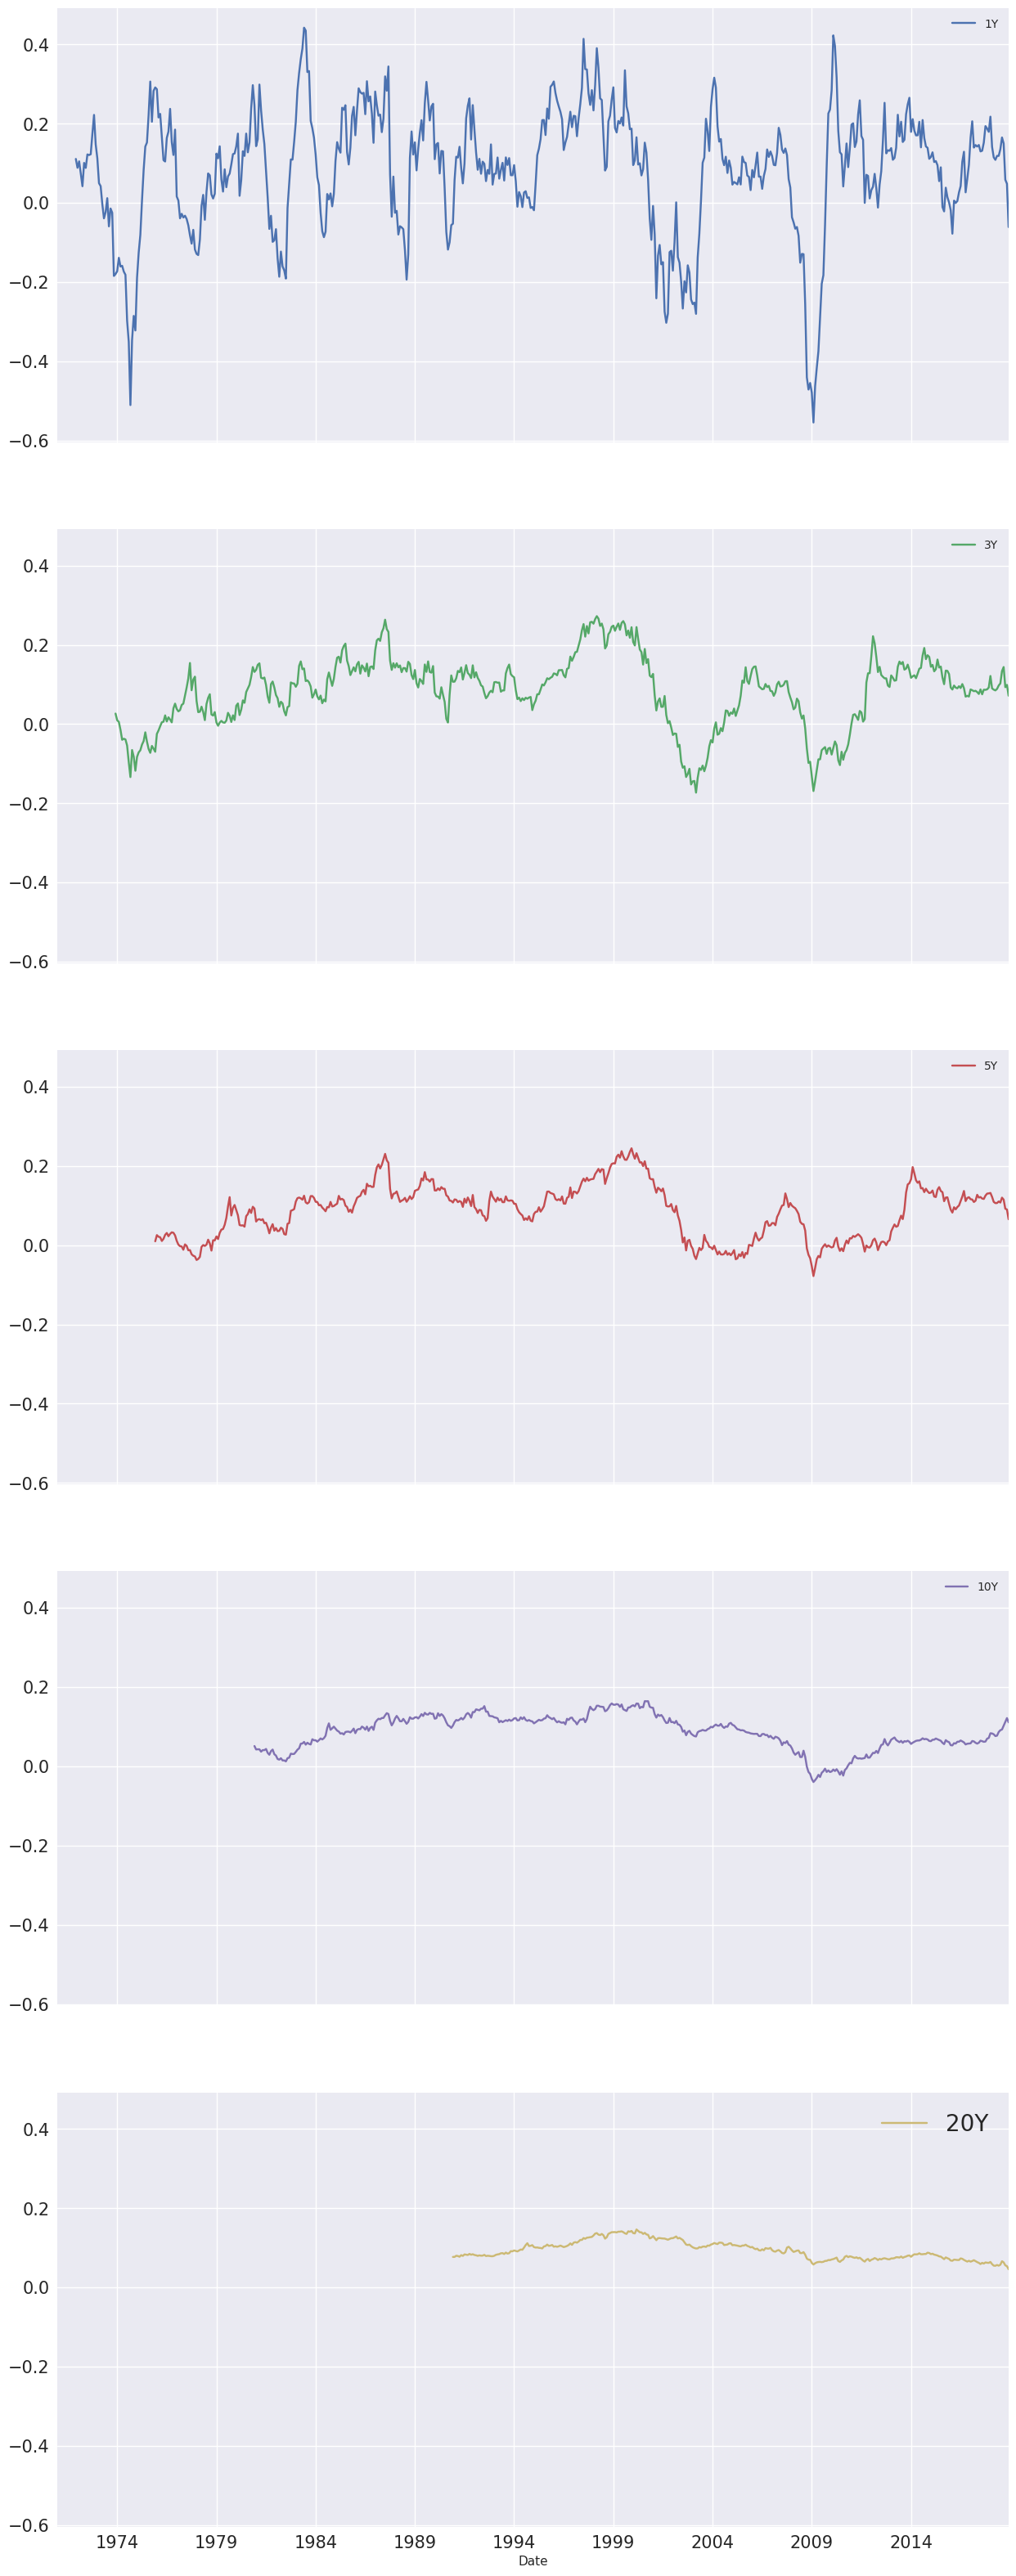

In [73]:
month_ret.iloc[:,-5:].plot(figsize = (15,40), subplots =True, fontsize= 15, sharey = True)
plt.legend(fontsize = 20)
plt.show()

## Simple Returns vs. Log Returns

In [74]:
import pandas as pd
import numpy as np

In [75]:
df = pd.DataFrame(index = [2016, 2017, 2018], data = [100, 50, 95], columns = ["Price"])

In [76]:
df

Price
2016    100
2017     50
2018     95

In [77]:
simple_returns = df.pct_change().dropna()
simple_returns

Price
2017   -0.5
2018    0.9

In [78]:
simple_returns.mean()

Price    0.2
dtype: float64

In [79]:
100 * 1.2 * 1.2

144.0

In [80]:
df

Price
2016    100
2017     50
2018     95

In [81]:
np.log(df / df.shift(1))

Price
2016       NaN
2017 -0.693147
2018  0.641854

In [82]:
log_returns = np.log(df / df.shift(1)).dropna()

In [83]:
log_returns

Price
2017 -0.693147
2018  0.641854

In [84]:
log_returns.mean()

Price   -0.025647
dtype: float64

In [85]:
100 * np.exp(2 * log_returns.mean())

Price    95.0
dtype: float64

## The S&P 500 Return Triangle

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [90]:
SP500 = pd.read_csv("data/SP500.csv", parse_dates= ["Date"], index_col= "Date", 
                    usecols = ["Date", "Close"])

In [91]:
SP500.head()

Close
Date                 
1970-12-31  92.150002
1971-01-04  91.150002
1971-01-05  91.800003
1971-01-06  92.349998
1971-01-07  92.379997

In [92]:
SP500 = SP500.loc["1988-12-30":"2018-12-31"].copy()

In [93]:
SP500.head()

Close
Date                  
1988-12-30  277.720001
1989-01-03  275.309998
1989-01-04  279.429993
1989-01-05  280.010010
1989-01-06  280.670013

In [94]:
annual = SP500.resample("A", kind = "period").last()
annual

/tmp/ipykernel_245409/2037654635.py:1: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  annual = SP500.resample("A", kind = "period").last()
/tmp/ipykernel_245409/2037654635.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual = SP500.resample("A", kind = "period").last()


Close
Date             
1988   277.720001
1989   353.399994
1990   330.220001
1991   417.089996
1992   435.709991
1993   466.450012
1994   459.269989
1995   615.929993
1996   740.739990
1997   970.429993
1998  1229.229980
1999  1469.250000
2000  1320.280029
2001  1148.079956
2002   879.820007
2003  1111.920044
2004  1211.920044
2005  1248.290039
2006  1418.300049
2007  1468.359985
2008   903.250000
2009  1115.099976
2010  1257.640015
2011  1257.599976
2012  1426.189941
2013  1848.359985
2014  2058.899902
2015  2043.939941
2016  2238.830078
2017  2673.610107
2018  2485.739990

In [95]:
annual["Return"] = np.log(annual.Close / annual.Close.shift())

In [96]:

annual.dropna(inplace = True)

In [97]:
annual

Close    Return
Date                       
1989   353.399994  0.240987
1990   330.220001 -0.067841
1991   417.089996  0.233543
1992   435.709991  0.043675
1993   466.450012  0.068174
1994   459.269989 -0.015513
1995   615.929993  0.293495
1996   740.739990  0.184516
1997   970.429993  0.270090
1998  1229.229980  0.236404
1999  1469.250000  0.178364
2000  1320.280029 -0.106908
2001  1148.079956 -0.139753
2002   879.820007 -0.266129
2003  1111.920044  0.234126
2004  1211.920044  0.086118
2005  1248.290039  0.029569
2006  1418.300049  0.127684
2007  1468.359985  0.034687
2008   903.250000 -0.485902
2009  1115.099976  0.210700
2010  1257.640015  0.120293
2011  1257.599976 -0.000032
2012  1426.189941  0.125801
2013  1848.359985  0.259292
2014  2058.899902  0.107873
2015  2043.939941 -0.007293
2016  2238.830078  0.091074
2017  2673.610107  0.177476
2018  2485.739990 -0.072859

In [98]:
years = annual.index.size
years

30

In [99]:
windows = [year for year in range(30, 0, -1)]
windows

[30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]

In [100]:
for year in windows:
    annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

In [101]:
annual

Close    Return       30Y       29Y       28Y       27Y       26Y  \
Date                                                                            
1989   353.399994  0.240987       NaN       NaN       NaN       NaN       NaN   
1990   330.220001 -0.067841       NaN       NaN       NaN       NaN       NaN   
1991   417.089996  0.233543       NaN       NaN       NaN       NaN       NaN   
1992   435.709991  0.043675       NaN       NaN       NaN       NaN       NaN   
1993   466.450012  0.068174       NaN       NaN       NaN       NaN       NaN   
1994   459.269989 -0.015513       NaN       NaN       NaN       NaN       NaN   
1995   615.929993  0.293495       NaN       NaN       NaN       NaN       NaN   
1996   740.739990  0.184516       NaN       NaN       NaN       NaN       NaN   
1997   970.429993  0.270090       NaN       NaN       NaN       NaN       NaN   
1998  1229.229980  0.236404       NaN       NaN       NaN       NaN       NaN   
1999  1469.250000  0.178364       NaN       NaN       NaN       NaN       NaN   
2000  1320.280029 -0.106908       NaN       NaN       NaN       NaN       NaN   
2001  1148.079956 -0.139753       NaN       NaN       NaN       NaN       NaN   
2002   879.820007 -0.266129       NaN       NaN       NaN       NaN       NaN   
2003  1111.920044  0.234126       NaN       NaN       NaN       NaN       NaN   
2004  1211.920044  0.086118       NaN       NaN       NaN       NaN       NaN   
2005  1248.290039  0.029569       NaN       NaN       NaN       NaN       NaN   
2006  1418.300049  0.127684       NaN       NaN       NaN       NaN       NaN   
2007  1468.359985  0.034687       NaN       NaN       NaN       NaN       NaN   
2008   903.250000 -0.485902       NaN       NaN       NaN       NaN       NaN   
2009  1115.099976  0.210700       NaN       NaN       NaN       NaN       NaN   
2010  1257.640015  0.120293       NaN       NaN       NaN       NaN       NaN   
2011  1257.599976 -0.000032       NaN       NaN       NaN       NaN       NaN   
2012  1426.189941  0.125801       NaN       NaN       NaN       NaN       NaN   
2013  1848.359985  0.259292       NaN       NaN       NaN       NaN       NaN   
2014  2058.899902  0.107873       NaN       NaN       NaN       NaN  0.077051   
2015  2043.939941 -0.007293       NaN       NaN       NaN  0.073927  0.067501   
2016  2238.830078  0.091074       NaN       NaN  0.074539  0.068374  0.073613   
2017  2673.610107  0.177476       NaN  0.078089  0.072271  0.077460  0.071457   
2018  2485.739990 -0.072859  0.073057  0.067266  0.072092  0.066112  0.066975   

           25Y       24Y       23Y  ...       10Y        9Y        8Y  \
Date                                ...                                 
1989       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1990       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1991       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1992       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1993       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1994       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1995       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1996       NaN       NaN       NaN  ...       NaN       NaN  0.122630   
1997       NaN       NaN       NaN  ...       NaN  0.139014  0.126267   
1998       NaN       NaN       NaN  ...  0.148753  0.138505  0.164298   
1999       NaN       NaN       NaN  ...  0.142491  0.165861  0.157401   
2000       NaN       NaN       NaN  ...  0.138584  0.128033  0.138578   
2001       NaN       NaN       NaN  ...  0.101254  0.107652  0.112587   
2002       NaN       NaN       NaN  ...  0.070274  0.070507  0.081260   
2003       NaN       NaN       NaN  ...  0.086869  0.098245  0.073839   
2004       NaN       NaN       NaN  ...  0.097032  0.075203  0.061539   
2005       NaN       NaN       NaN  ...  0.070640  0.057987  0.031474   
2006       NaN       NaN       N

In [102]:
triangle = annual.drop(columns = ["Close", "Return"])

In [103]:
triangle

30Y       29Y       28Y       27Y       26Y       25Y       24Y  \
Date                                                                         
1989       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1990       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1991       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1992       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1993       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1994       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1995       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1996       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1997       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1998       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1999       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2000       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2001       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2002       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2003       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2004       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2005       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2006       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2007       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2008       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2009       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2010       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2011       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2012       NaN       NaN       NaN       NaN       NaN       NaN  0.068173   
2013       NaN       NaN       NaN       NaN       NaN  0.075818  0.068936   
2014       NaN       NaN       NaN       NaN  0.077051  0.070493  0.076257   
2015       NaN       NaN       NaN  0.073927  0.067501  0.072915  0.066222   
2016       NaN       NaN  0.074539  0.068374  0.073613  0.067216  0.068197   
2017       NaN  0.078089  0.072271  0.077460  0.071457  0.072568  0.072751   
2018  0.073057  0.067266  0.072092  0.066112  0.066975  0.066927  0.070362   

           23Y       22Y       21Y  ...       10Y        9Y        8Y  \
Date                                ...                                 
1989       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1990       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1991       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1992       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1993       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1994       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1995       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1996       NaN       NaN       NaN  ...       NaN       NaN  0.122630   
1997       NaN       NaN       NaN  ...       NaN  0.139014  0.126267   
1998       NaN       NaN       NaN  ...  0.148753  0.138505  0.164298   
1999       NaN       NaN       NaN  ...  0.142491  0.165861  0.157401   
2000       NaN       NaN       NaN  ...  0.138584  0.128033  0.138578   
2001       NaN       NaN       NaN  ...  0.101254  0.107652  0.112587   
2002       NaN       NaN       NaN  ...  0.070274  0.070507  0.081260   
2003       NaN       NaN       NaN  ...  0.086869  0.098245  0.073839   
2004       NaN       NaN       NaN  ...  0.097032  0.075203  0.061539   
2005       NaN       NaN       NaN  ...  0.070640  0.057987  0.031474   
2006       NaN       NaN       NaN  ...  0.064956  0.042164  0.017884   
2007       NaN       NaN       NaN  ...  0.041416  0.0

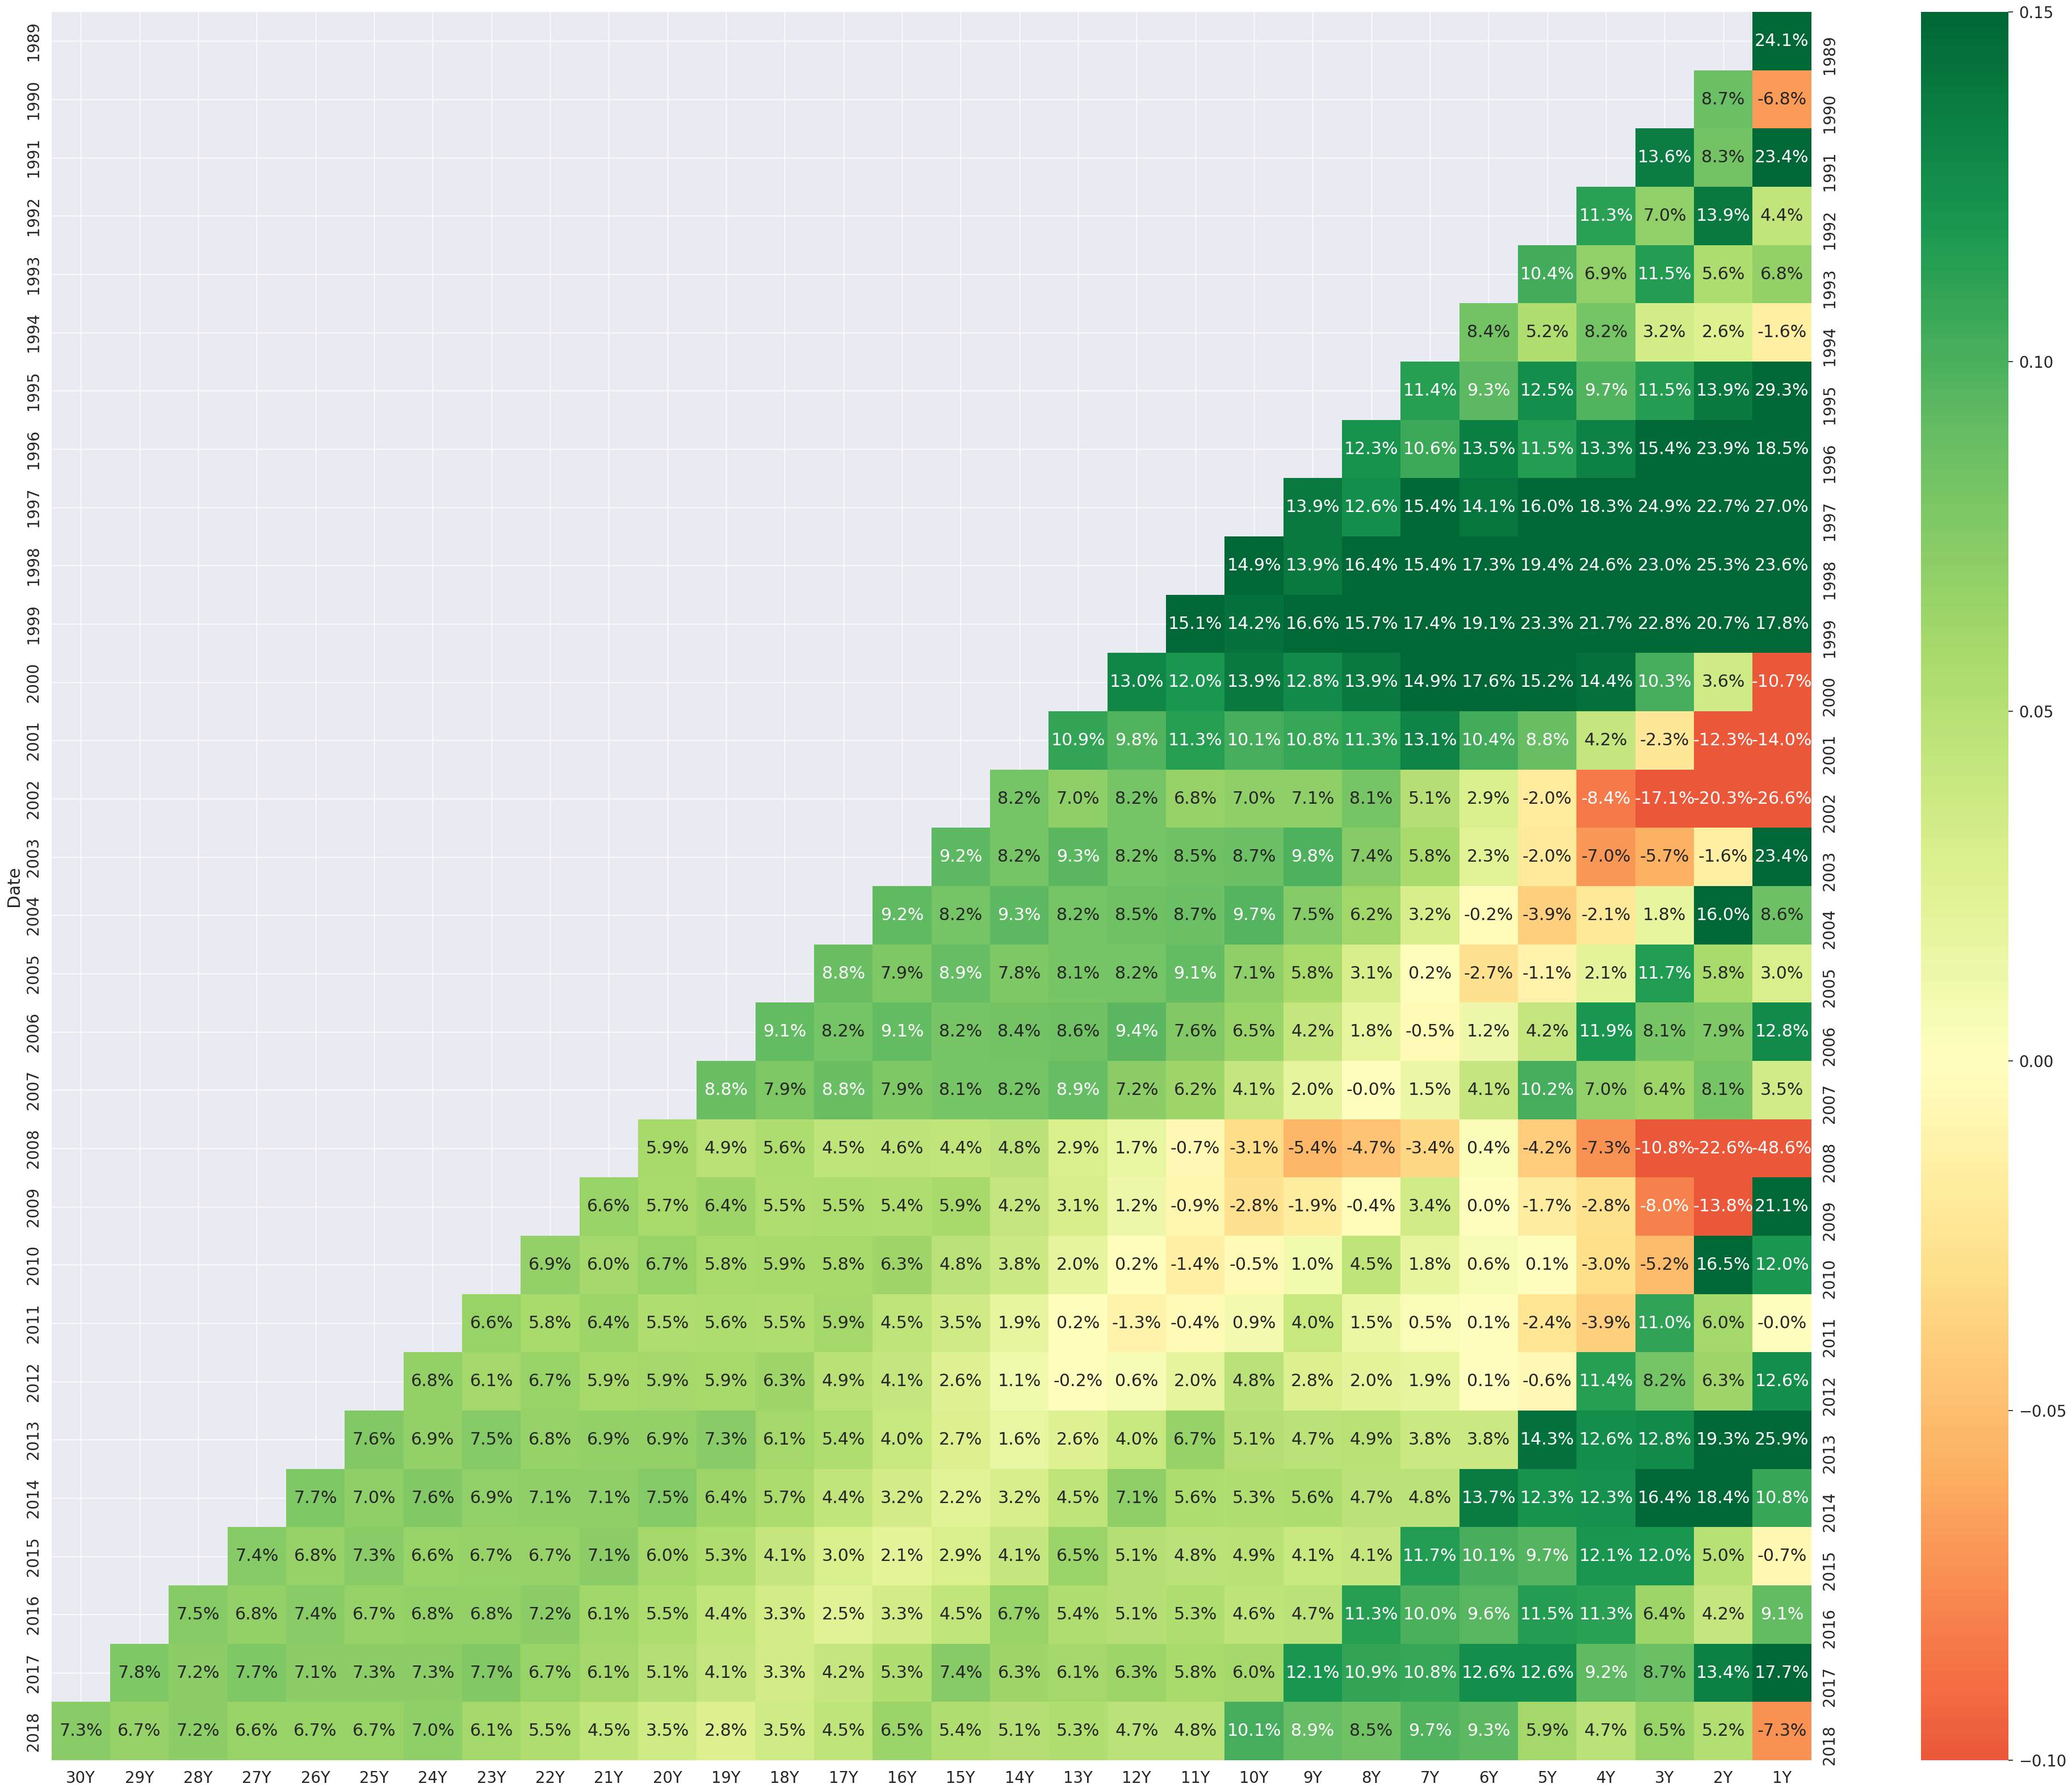

In [104]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".1%", cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright =True)
plt.show()

## The S&P 500 Dollar Triangle

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.02f}'.format

In [117]:
SP500 = pd.read_csv("data/SP500.csv", parse_dates= ["Date"], index_col= "Date", 
                    usecols = ["Date", "Close"])

In [118]:
SP500.head()

Close
Date             
1970-12-31  92.15
1971-01-04  91.15
1971-01-05  91.80
1971-01-06  92.35
1971-01-07  92.38

In [119]:
SP500 = SP500.loc["1988-12-30":"2018-12-31"].copy()

In [120]:
SP500.head()

Close
Date             
1988-12-30 277.72
1989-01-03 275.31
1989-01-04 279.43
1989-01-05 280.01
1989-01-06 280.67

In [121]:
annual = SP500.resample("YE", kind = "period").last()
annual

/tmp/ipykernel_245409/2918635868.py:1: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  annual = SP500.resample("YE", kind = "period").last()


Close
Date        
1988  277.72
1989  353.40
1990  330.22
1991  417.09
1992  435.71
1993  466.45
1994  459.27
1995  615.93
1996  740.74
1997  970.43
1998 1229.23
1999 1469.25
2000 1320.28
2001 1148.08
2002  879.82
2003 1111.92
2004 1211.92
2005 1248.29
2006 1418.30
2007 1468.36
2008  903.25
2009 1115.10
2010 1257.64
2011 1257.60
2012 1426.19
2013 1848.36
2014 2058.90
2015 2043.94
2016 2238.83
2017 2673.61
2018 2485.74

In [122]:
annual["Return"] = np.log(annual.Close / annual.Close.shift())

In [123]:
annual.dropna(inplace = True)

In [124]:
annual

Close  Return
Date                
1989  353.40    0.24
1990  330.22   -0.07
1991  417.09    0.23
1992  435.71    0.04
1993  466.45    0.07
1994  459.27   -0.02
1995  615.93    0.29
1996  740.74    0.18
1997  970.43    0.27
1998 1229.23    0.24
1999 1469.25    0.18
2000 1320.28   -0.11
2001 1148.08   -0.14
2002  879.82   -0.27
2003 1111.92    0.23
2004 1211.92    0.09
2005 1248.29    0.03
2006 1418.30    0.13
2007 1468.36    0.03
2008  903.25   -0.49
2009 1115.10    0.21
2010 1257.64    0.12
2011 1257.60   -0.00
2012 1426.19    0.13
2013 1848.36    0.26
2014 2058.90    0.11
2015 2043.94   -0.01
2016 2238.83    0.09
2017 2673.61    0.18
2018 2485.74   -0.07

In [125]:
years = annual.index.size
years

30

In [126]:
windows = [year for year in range(30, 0, -1)]
windows

[30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]

In [ ]:
#for year in windows:
    #annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

In [127]:
for year in windows:
    annual["{}Y".format(year)] = np.exp(year * annual.Return.rolling(year).mean()) * 100

In [128]:
annual

Close  Return    30Y    29Y    28Y    27Y    26Y    25Y    24Y    23Y  \
Date                                                                           
1989  353.40    0.24    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1990  330.22   -0.07    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1991  417.09    0.23    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1992  435.71    0.04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1993  466.45    0.07    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1994  459.27   -0.02    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1995  615.93    0.29    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1996  740.74    0.18    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1997  970.43    0.27    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1998 1229.23    0.24    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1999 1469.25    0.18    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2000 1320.28   -0.11    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2001 1148.08   -0.14    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2002  879.82   -0.27    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2003 1111.92    0.23    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2004 1211.92    0.09    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2005 1248.29    0.03    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006 1418.30    0.13    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2007 1468.36    0.03    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2008  903.25   -0.49    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2009 1115.10    0.21    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010 1257.64    0.12    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011 1257.60   -0.00    NaN    NaN    NaN    NaN    NaN    NaN    NaN 452.83   
2012 1426.19    0.13    NaN    NaN    NaN    NaN    NaN    NaN 513.54 403.56   
2013 1848.36    0.26    NaN    NaN    NaN    NaN    NaN 665.55 523.02 559.74   
2014 2058.90    0.11    NaN    NaN    NaN    NaN 741.36 582.60 623.49 493.63   
2015 2043.94   -0.01    NaN    NaN    NaN 735.97 578.36 618.96 490.05 469.11   
2016 2238.83    0.09    NaN    NaN 806.15 633.51 677.98 536.77 513.83 479.97   
2017 2673.61    0.18    NaN 962.70 756.54 809.65 641.02 613.62 573.18 582.14   
2018 2485.74   -0.07 895.05 703.38 752.75 595.97 570.50 532.91 541.24 403.58   

      ...    10Y     9Y     8Y     7Y     6Y     5Y     4Y     3Y     2Y  \
Date  ...                                                                  
1989  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1990  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN 118.90   
1991  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN 150.18 118.02   
1992  ...    NaN    NaN    NaN    NaN    NaN    NaN 156.89 123.29 131.95   
1993  ...    NaN    NaN    NaN    NaN    NaN 167.96 131.99 141.25 111.83   
1994  ...    NaN    NaN    NaN    NaN 165.37 129.96 139.08 110.11 105.41   
1995  ...    NaN    NaN    NaN 221.78 174.29 186.52 147.67 141.36 132.05   
1996  ...    NaN    NaN 266.72 209.60 224.32 177.60 170.01 158.80 161.29   
1997  ...    NaN 349.43 274.60 293.87 232.67 222.72 208.05 211.30 157.56   
1998  ... 442.61 347.83 372.25 294.72 282.12 263.53 267.65 199.57 165.95   
1999  ... 415.75 444.93 352.26 337.21 314.99 319.91 238.54 198.35 151.40   
2000  ... 399.82 316.55 303.02 283.05 287.47 214.36 178.24 136.05 107.41   
2001  ... 275.26 263.50 246.13 249.98 186.40 154.99 118.31  93.40  78.14   
2002  ... 201.93 188.62 191.57 142.84 118.78  90.66  71.57  59.88  66.64   
2003  ... 238.38 242.11 180.53 150.11 114.58  90.46  75.68  84.22  96.85   
2004  ... 263.88 196.76 163.61 124.88  98.59  82.49  91.79 105.56 137.75   
2005  ... 202.67 168.52 128.63 101.55  84.96  94.55 108.73 141.88 112.26   
20

In [129]:
triangle = annual.drop(columns = ["Close", "Return"])

In [130]:
triangle

30Y    29Y    28Y    27Y    26Y    25Y    24Y    23Y    22Y    21Y  \
Date                                                                         
1989    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1990    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1991    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1992    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1993    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1994    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1995    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1996    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1997    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1998    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1999    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2000    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2001    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2002    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2003    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2004    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2005    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2007    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2008    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2009    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN 401.52   
2010    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN 452.84 355.87   
2011    NaN    NaN    NaN    NaN    NaN    NaN    NaN 452.83 355.86 380.84   
2012    NaN    NaN    NaN    NaN    NaN    NaN 513.54 403.56 431.89 341.94   
2013    NaN    NaN    NaN    NaN    NaN 665.55 523.02 559.74 443.16 424.22   
2014    NaN    NaN    NaN    NaN 741.36 582.60 623.49 493.63 472.54 441.40   
2015    NaN    NaN    NaN 735.97 578.36 618.96 490.05 469.11 438.19 445.04   
2016    NaN    NaN 806.15 633.51 677.98 536.77 513.83 479.97 487.48 363.49   
2017    NaN 962.70 756.54 809.65 641.02 613.62 573.18 582.14 434.08 360.94   
2018 895.05 703.38 752.75 595.97 570.50 532.91 541.24 403.58 335.58 256.15   

      ...    10Y     9Y     8Y     7Y     6Y     5Y     4Y     3Y     2Y  \
Date  ...                                                                  
1989  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1990  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN 118.90   
1991  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN 150.18 118.02   
1992  ...    NaN    NaN    NaN    NaN    NaN    NaN 156.89 123.29 131.95   
1993  ...    NaN    NaN    NaN    NaN    NaN 167.96 131.99 141.25 111.83   
1994  ...    NaN    NaN    NaN    NaN 165.37 129.96 139.08 110.11 105.41   
1995  ...    NaN    NaN    NaN 221.78 174.29 186.52 147.67 141.36 132.05   
1996  ...    NaN    NaN 266.72 209.60 224.32 177.60 170.01 158.80 161.29   
1997  ...    NaN 349.43 274.60 293.87 232.67 222.72 208.05 211.30 157.56   
1998  ... 442.61 347.83 372.25 294.72 282.12 263.53 267.65 199.57 165.95   
1999  ... 415.75 444.93 352.26 337.21 314.99 319.91 238.54 198.35 151.40   
2000  ... 399.82 316.55 303.02 283.05 287.47 214.36 178.24 136.05 107.41   
2001  ... 275.26 263.50 246.13 249.98 186.40 154.99 118.31  93.40  78.14   
2002  ... 201.93 188.62 191.57 142.84 118.78  90.66  71.57  59.88  66.64   
2003  ... 238.38 242.11 180.53 150.11 114.58  90.46  75.68  84.22  96.85   
2004  ... 263.88 196.76 163.61 124.88  98.59  82.49  91.79 105.56 137.75   
2005  ... 202.67 168.52 128.63 101.55  84.96  94.55 108.73 141.88 112.26   
2006  ... 191.47 146.15 115.38  96.53 107.42 123.54 161.20 127.55 1

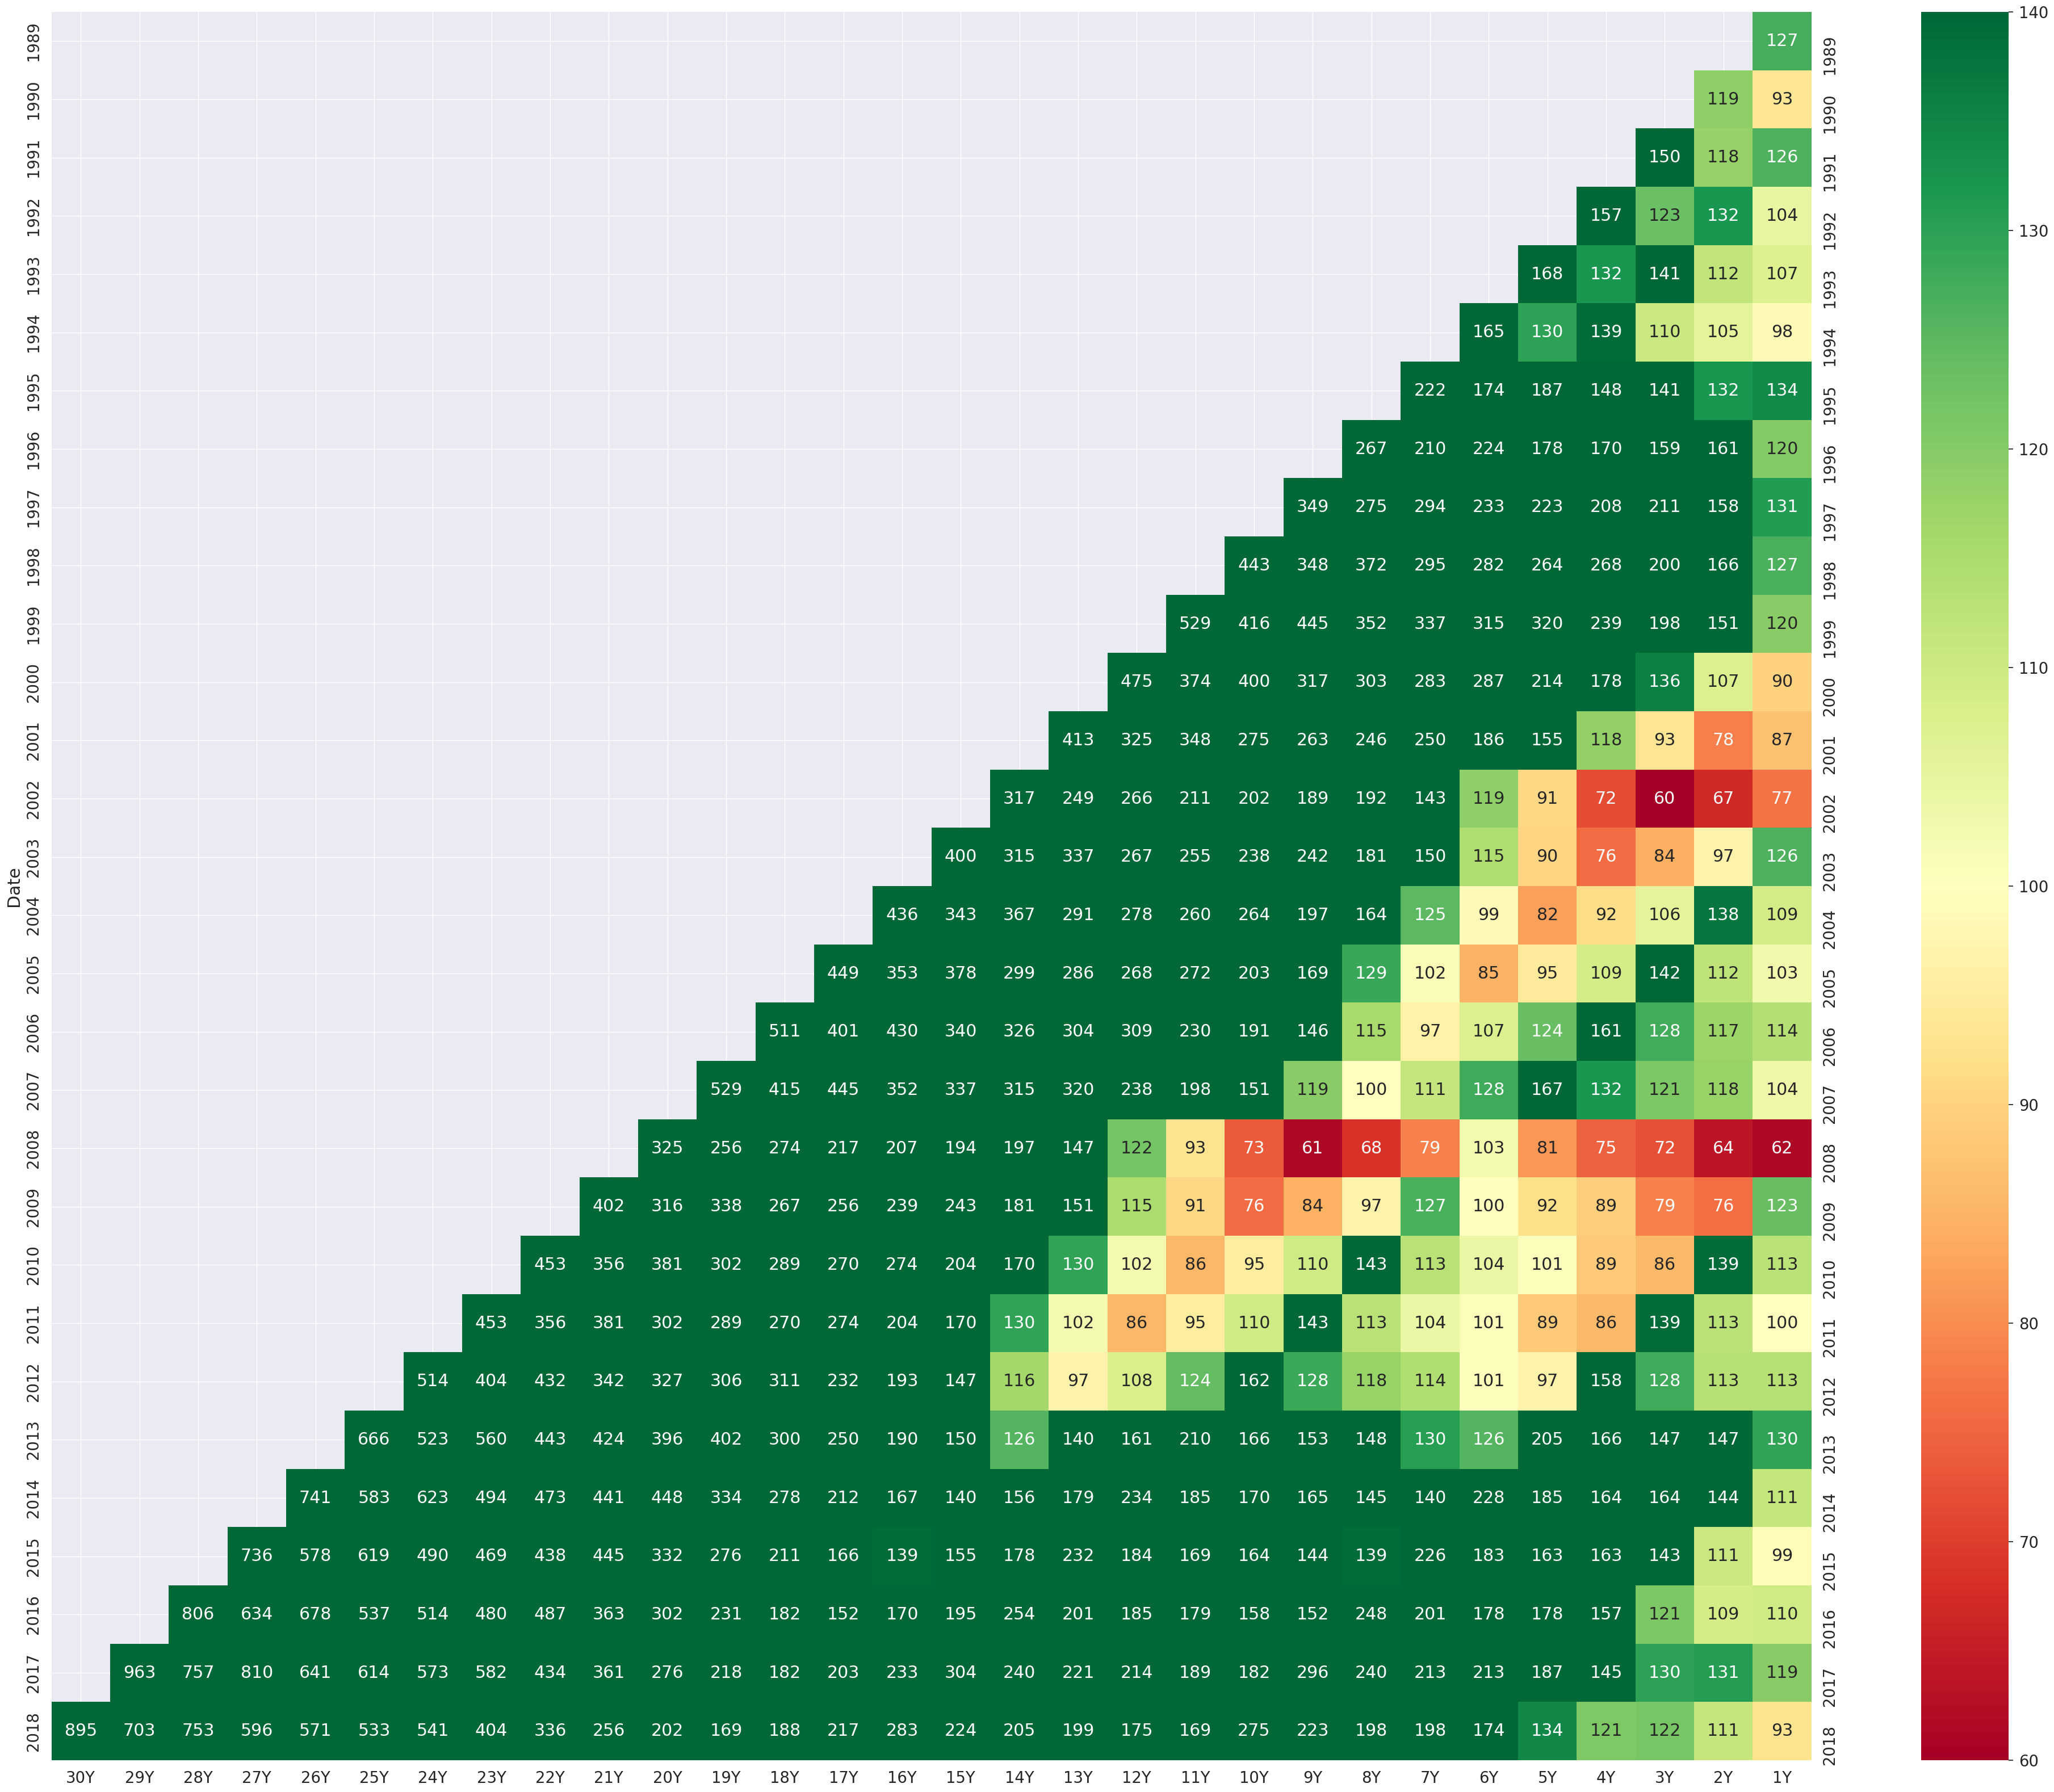

In [131]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".0f",  cmap = "RdYlGn", 
            vmin =60, vmax = 140, center = 100)
plt.tick_params(axis = "y", labelright =True)
plt.show()

## The S&P 500 Return Radar

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [133]:
SP500 = pd.read_csv("data/SP500.csv", parse_dates= ["Date"], index_col= "Date", 
                    usecols = ["Date", "Close"])

In [134]:
SP500.head()

Close
Date             
1970-12-31  92.15
1971-01-04  91.15
1971-01-05  91.80
1971-01-06  92.35
1971-01-07  92.38

In [135]:
SP500 = SP500.loc["1988-12-30":"2018-12-31"].copy()

In [136]:
SP500.head()

Close
Date             
1988-12-30 277.72
1989-01-03 275.31
1989-01-04 279.43
1989-01-05 280.01
1989-01-06 280.67

In [137]:
weekly = SP500.resample("W", kind = "period").last()
weekly

/tmp/ipykernel_245409/2514963117.py:1: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  weekly = SP500.resample("W", kind = "period").last()


Close
Date                         
1988-12-26/1989-01-01  277.72
1989-01-02/1989-01-08  280.67
1989-01-09/1989-01-15  283.87
1989-01-16/1989-01-22  286.63
1989-01-23/1989-01-29  293.82
...                       ...
2018-11-26/2018-12-02 2760.17
2018-12-03/2018-12-09 2633.08
2018-12-10/2018-12-16 2599.95
2018-12-17/2018-12-23 2416.62
2018-12-24/2018-12-30 2485.74

[1566 rows x 1 columns]

In [138]:
weekly["Return"] = np.log(weekly.Close / weekly.Close.shift())*52

In [139]:
weekly.dropna(inplace = True)

In [140]:
weekly

Close  Return
Date                                 
1989-01-02/1989-01-08  280.67    0.55
1989-01-09/1989-01-15  283.87    0.59
1989-01-16/1989-01-22  286.63    0.50
1989-01-23/1989-01-29  293.82    1.29
1989-01-30/1989-02-05  296.97    0.55
...                       ...     ...
2018-11-26/2018-12-02 2760.17    2.46
2018-12-03/2018-12-09 2633.08   -2.45
2018-12-10/2018-12-16 2599.95   -0.66
2018-12-17/2018-12-23 2416.62   -3.80
2018-12-24/2018-12-30 2485.74    1.47

[1565 rows x 2 columns]

In [141]:
weeks = weekly.index.size
weeks

1565

In [142]:
windows = [week for week in range(weeks, 0, -1)]
windows

[1565,
 1564,
 1563,
 1562,
 1561,
 1560,
 1559,
 1558,
 1557,
 1556,
 1555,
 1554,
 1553,
 1552,
 1551,
 1550,
 1549,
 1548,
 1547,
 1546,
 1545,
 1544,
 1543,
 1542,
 1541,
 1540,
 1539,
 1538,
 1537,
 1536,
 1535,
 1534,
 1533,
 1532,
 1531,
 1530,
 1529,
 1528,
 1527,
 1526,
 1525,
 1524,
 1523,
 1522,
 1521,
 1520,
 1519,
 1518,
 1517,
 1516,
 1515,
 1514,
 1513,
 1512,
 1511,
 1510,
 1509,
 1508,
 1507,
 1506,
 1505,
 1504,
 1503,
 1502,
 1501,
 1500,
 1499,
 1498,
 1497,
 1496,
 1495,
 1494,
 1493,
 1492,
 1491,
 1490,
 1489,
 1488,
 1487,
 1486,
 1485,
 1484,
 1483,
 1482,
 1481,
 1480,
 1479,
 1478,
 1477,
 1476,
 1475,
 1474,
 1473,
 1472,
 1471,
 1470,
 1469,
 1468,
 1467,
 1466,
 1465,
 1464,
 1463,
 1462,
 1461,
 1460,
 1459,
 1458,
 1457,
 1456,
 1455,
 1454,
 1453,
 1452,
 1451,
 1450,
 1449,
 1448,
 1447,
 1446,
 1445,
 1444,
 1443,
 1442,
 1441,
 1440,
 1439,
 1438,
 1437,
 1436,
 1435,
 1434,
 1433,
 1432,
 1431,
 1430,
 1429,
 1428,
 1427,
 1426,
 1425,
 1424,
 1423,

In [143]:
for week in windows:
    weekly["{}W".format(week)] = weekly.Return.rolling(week).mean()

/tmp/ipykernel_245409/167997240.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weekly["{}W".format(week)] = weekly.Return.rolling(week).mean()
/tmp/ipykernel_245409/167997240.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weekly["{}W".format(week)] = weekly.Return.rolling(week).mean()
/tmp/ipykernel_245409/167997240.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

In [144]:
weekly

Close  Return  1565W  1564W  1563W  1562W  1561W  \
Date                                                                       
1989-01-02/1989-01-08  280.67    0.55    NaN    NaN    NaN    NaN    NaN   
1989-01-09/1989-01-15  283.87    0.59    NaN    NaN    NaN    NaN    NaN   
1989-01-16/1989-01-22  286.63    0.50    NaN    NaN    NaN    NaN    NaN   
1989-01-23/1989-01-29  293.82    1.29    NaN    NaN    NaN    NaN    NaN   
1989-01-30/1989-02-05  296.97    0.55    NaN    NaN    NaN    NaN    NaN   
...                       ...     ...    ...    ...    ...    ...    ...   
2018-11-26/2018-12-02 2760.17    2.46    NaN    NaN    NaN    NaN   0.08   
2018-12-03/2018-12-09 2633.08   -2.45    NaN    NaN    NaN   0.07   0.07   
2018-12-10/2018-12-16 2599.95   -0.66    NaN    NaN   0.07   0.07   0.07   
2018-12-17/2018-12-23 2416.62   -3.80    NaN   0.07   0.07   0.07   0.07   
2018-12-24/2018-12-30 2485.74    1.47   0.07   0.07   0.07   0.07   0.07   

                       1560W  1559W  1558W  ...   10W    9W    8W    7W    6W  \
Date                                        ...                                 
1989-01-02/1989-01-08    NaN    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   
1989-01-09/1989-01-15    NaN    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   
1989-01-16/1989-01-22    NaN    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   
1989-01-23/1989-01-29    NaN    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   
1989-01-30/1989-02-05    NaN    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   
...                      ...    ...    ...  ...   ...   ...   ...   ...   ...   
2018-11-26/2018-12-02   0.08   0.08   0.08  ... -0.31 -0.31 -0.29 -0.02 -0.02   
2018-12-03/2018-12-09   0.07   0.07   0.07  ... -0.53 -0.53 -0.32 -0.37 -0.08   
2018-12-10/2018-12-16   0.07   0.07   0.07  ... -0.54 -0.36 -0.41 -0.17 -0.40   
2018-12-17/2018-12-23   0.07   0.07   0.07  ... -0.70 -0.78 -0.62 -0.89 -1.22   
2018-12-24/2018-12-30   0.07   0.07   0.07  ... -0.56 -0.39 -0.59 -0.83 -0.83   

                         5W    4W    3W    2W    1W  
Date                                                 
1989-01-02/1989-01-08   NaN   NaN   NaN   NaN  0.55  
1989-01-09/1989-01-15   NaN   NaN   NaN  0.57  0.59  
1989-01-16/1989-01-22   NaN   NaN  0.55  0.55  0.50  
1989-01-23/1989-01-29   NaN  0.73  0.79  0.90  1.29  
1989-01-30/1989-02-05  0.70  0.73  0.78  0.92  0.55  
...                     ...   ...   ...   ...   ...  
2018-11-26/2018-12-02  0.39  0.18 -0.13  0.23  2.46  
2018-12-03/2018-12-09 -0.35 -0.71 -0.67  0.01 -2.45  
2018-12-10/2018-12-16 -0.70 -0.66 -0.22 -1.55 -0.66  
2018-12-17/2018-12-23 -1.29 -1.11 -2.30 -2.23 -3.80  
2018-12-24/2018-12-30 -0.60 -1.36 -1.00 -1.17  1.47  

[1565 rows x 1567 columns]

In [145]:
triangle = weekly.drop(columns = ["Close", "Return"])

In [146]:
triangle

1565W  1564W  1563W  1562W  1561W  1560W  1559W  1558W  \
Date                                                                            
1989-01-02/1989-01-08    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1989-01-09/1989-01-15    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1989-01-16/1989-01-22    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1989-01-23/1989-01-29    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1989-01-30/1989-02-05    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...                      ...    ...    ...    ...    ...    ...    ...    ...   
2018-11-26/2018-12-02    NaN    NaN    NaN    NaN   0.08   0.08   0.08   0.08   
2018-12-03/2018-12-09    NaN    NaN    NaN   0.07   0.07   0.07   0.07   0.07   
2018-12-10/2018-12-16    NaN    NaN   0.07   0.07   0.07   0.07   0.07   0.07   
2018-12-17/2018-12-23    NaN   0.07   0.07   0.07   0.07   0.07   0.07   0.07   
2018-12-24/2018-12-30   0.07   0.07   0.07   0.07   0.07   0.07   0.07   0.07   

                       1557W  1556W  ...   10W    9W    8W    7W    6W    5W  \
Date                                 ...                                       
1989-01-02/1989-01-08    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1989-01-09/1989-01-15    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1989-01-16/1989-01-22    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1989-01-23/1989-01-29    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1989-01-30/1989-02-05    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN  0.70   
...                      ...    ...  ...   ...   ...   ...   ...   ...   ...   
2018-11-26/2018-12-02   0.07   0.07  ... -0.31 -0.31 -0.29 -0.02 -0.02  0.39   
2018-12-03/2018-12-09   0.07   0.07  ... -0.53 -0.53 -0.32 -0.37 -0.08 -0.35   
2018-12-10/2018-12-16   0.07   0.07  ... -0.54 -0.36 -0.41 -0.17 -0.40 -0.70   
2018-12-17/2018-12-23   0.07   0.07  ... -0.70 -0.78 -0.62 -0.89 -1.22 -1.29   
2018-12-24/2018-12-30   0.07   0.07  ... -0.56 -0.39 -0.59 -0.83 -0.83 -0.60   

                         4W    3W    2W    1W  
Date                                           
1989-01-02/1989-01-08   NaN   NaN   NaN  0.55  
1989-01-09/1989-01-15   NaN   NaN  0.57  0.59  
1989-01-16/1989-01-22   NaN  0.55  0.55  0.50  
1989-01-23/1989-01-29  0.73  0.79  0.90  1.29  
1989-01-30/1989-02-05  0.73  0.78  0.92  0.55  
...                     ...   ...   ...   ...  
2018-11-26/2018-12-02  0.18 -0.13  0.23  2.46  
2018-12-03/2018-12-09 -0.71 -0.67  0.01 -2.45  
2018-12-10/2018-12-16 -0.66 -0.22 -1.55 -0.66  
2018-12-17/2018-12-23 -1.11 -2.30 -2.23 -3.80  
2018-12-24/2018-12-30 -1.36 -1.00 -1.17  1.47  

[1565 rows x 1565 columns]

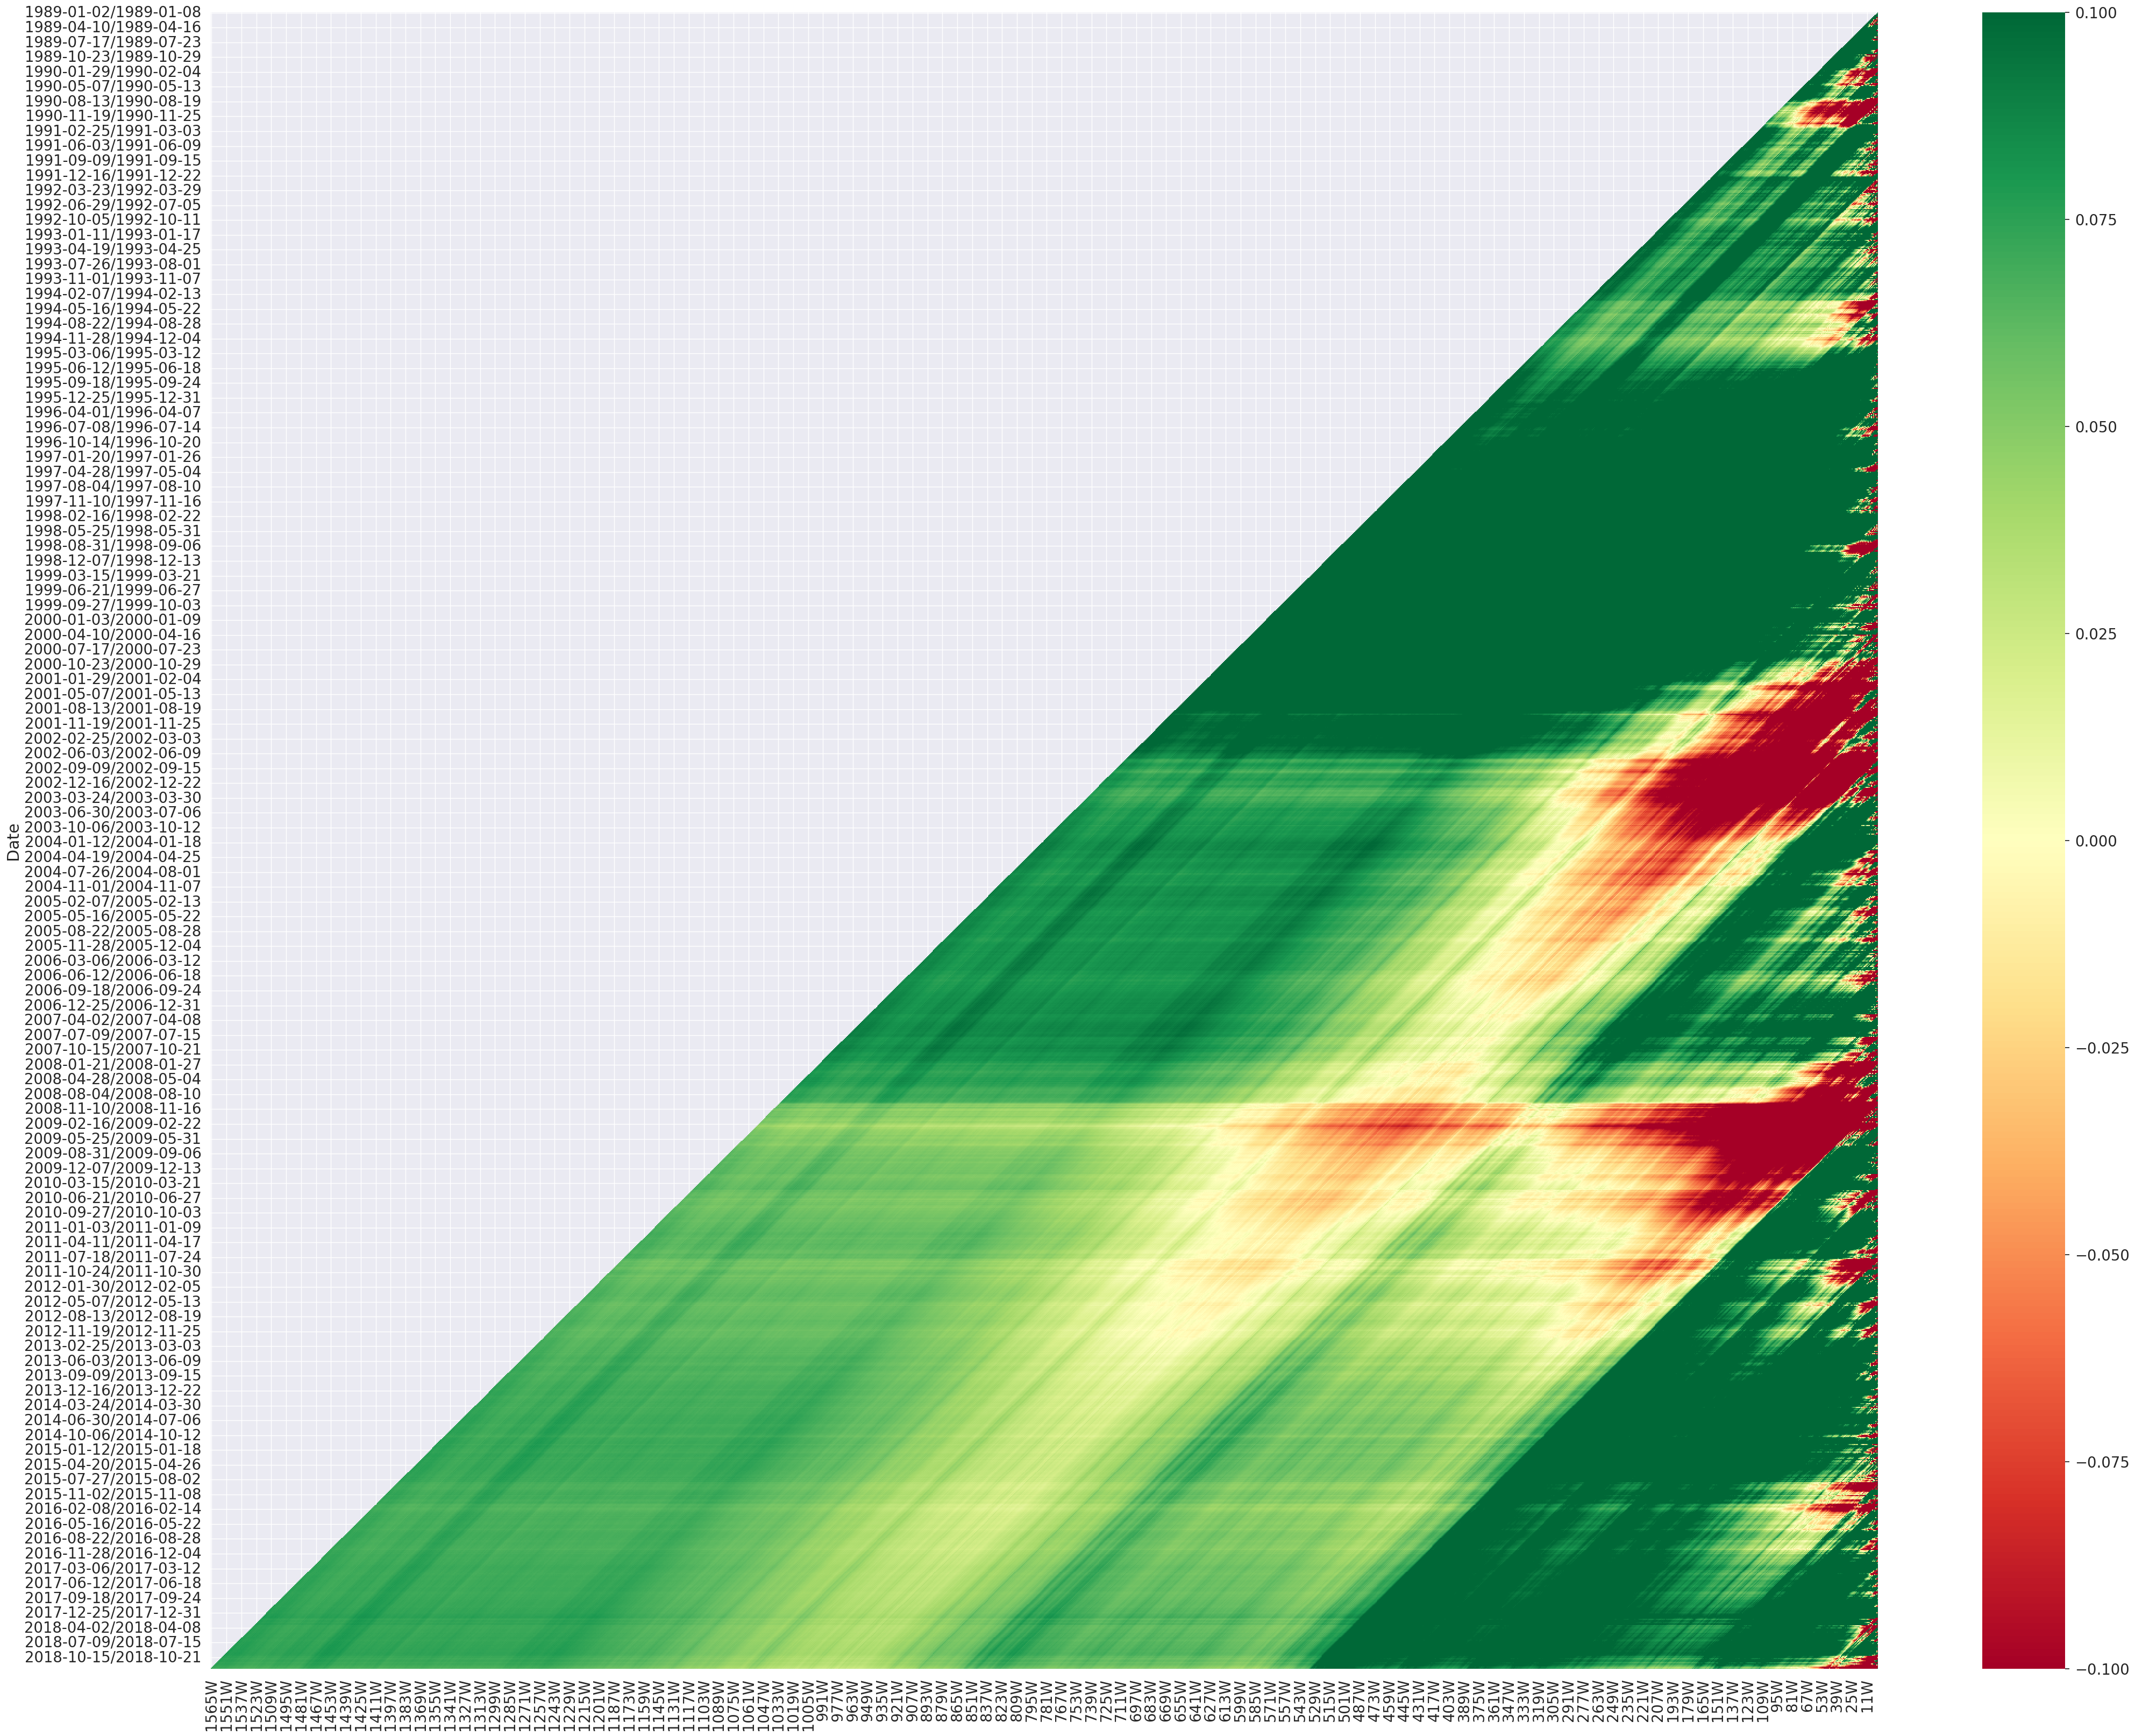

In [147]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot =False, cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.10, center = 0)
#plt.tick_params(axis = "y", labelright =True)
plt.show()

## Exponentially-weighted Moving Averages (EWMA)


In [148]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [149]:
SP500 = pd.read_csv("data/SP500.csv", parse_dates= ["Date"], index_col= "Date", usecols= ["Date", "Close"])

In [150]:
SP500.head()

Close
Date             
1970-12-31  92.15
1971-01-04  91.15
1971-01-05  91.80
1971-01-06  92.35
1971-01-07  92.38

In [151]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [152]:
SP500.Close.rolling(window = 10).mean()

Date
2008-12-31       NaN
2009-01-02       NaN
2009-01-05       NaN
2009-01-06       NaN
2009-01-07       NaN
               ...  
2018-12-21   2565.92
2018-12-24   2537.25
2018-12-26   2520.35
2018-12-27   2504.12
2018-12-28   2487.64
Name: Close, Length: 2516, dtype: float64

In [153]:
SP500.Close.ewm(span = 10, min_periods= 10).mean()

Date
2008-12-31       NaN
2009-01-02       NaN
2009-01-05       NaN
2009-01-06       NaN
2009-01-07       NaN
               ...  
2018-12-21   2547.12
2018-12-24   2511.48
2018-12-26   2503.52
2018-12-27   2500.85
2018-12-28   2498.10
Name: Close, Length: 2516, dtype: float64

In [155]:
SP500["SMA"] = SP500.Close.rolling(window = 100).mean()
SP500["EMA"] = SP500.Close.ewm(span = 100, min_periods= 100).mean()

In [156]:
SP500

Close     SMA     EMA
Date                              
2008-12-31  903.25     NaN     NaN
2009-01-02  931.80     NaN     NaN
2009-01-05  927.45     NaN     NaN
2009-01-06  934.70     NaN     NaN
2009-01-07  906.65     NaN     NaN
...            ...     ...     ...
2018-12-21 2416.62 2785.91 2732.09
2018-12-24 2351.10 2781.28 2724.54
2018-12-26 2467.70 2777.69 2719.46
2018-12-27 2488.83 2774.17 2714.89
2018-12-28 2485.74 2770.53 2710.35

[2516 rows x 3 columns]

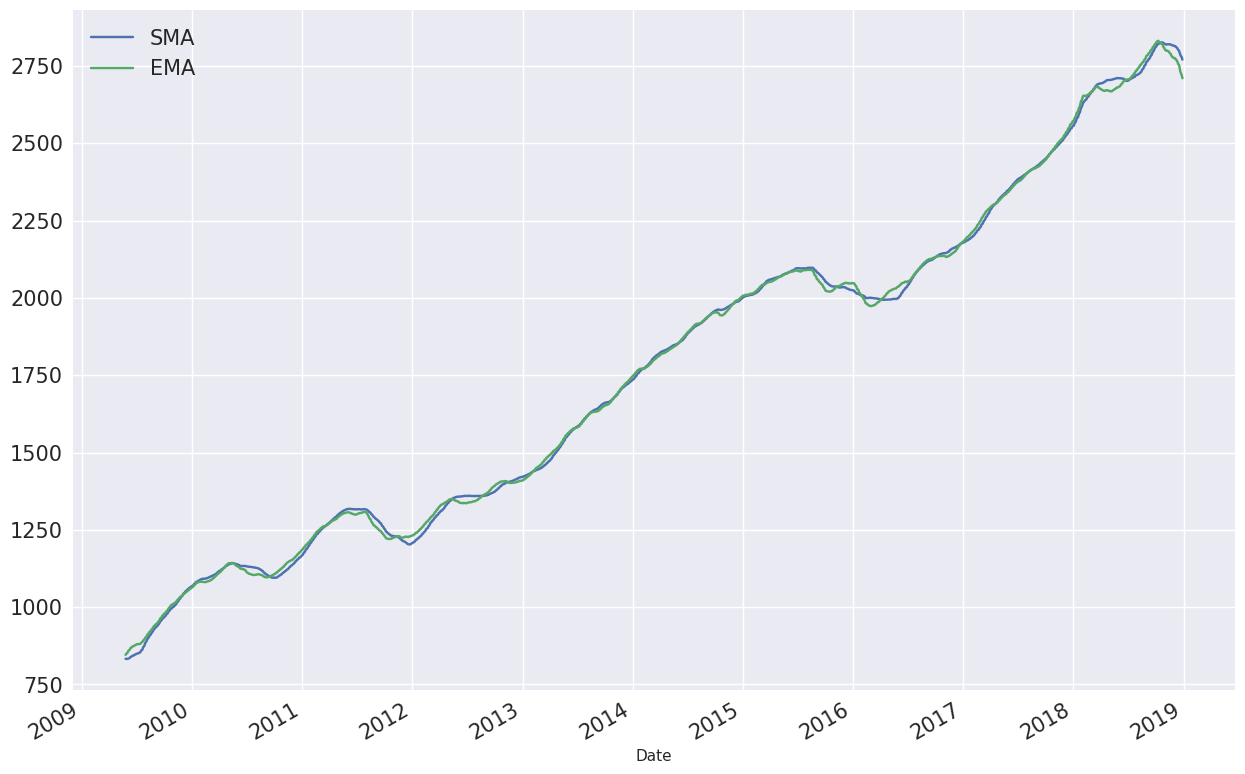

In [157]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize =15)
plt.legend(fontsize = 15)
plt.show()

### Expanding Windows

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [159]:
SP500 = pd.read_csv("data/SP500.csv", parse_dates= ["Date"], index_col= "Date", usecols= ["Date", "Close"])

In [160]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [161]:
SP500.head()

Close
Date             
2008-12-31 903.25
2009-01-02 931.80
2009-01-05 927.45
2009-01-06 934.70
2009-01-07 906.65

In [162]:
SP500.Close.rolling(10).mean()

Date
2008-12-31       NaN
2009-01-02       NaN
2009-01-05       NaN
2009-01-06       NaN
2009-01-07       NaN
               ...  
2018-12-21   2565.92
2018-12-24   2537.25
2018-12-26   2520.35
2018-12-27   2504.12
2018-12-28   2487.64
Name: Close, Length: 2516, dtype: float64

In [163]:
SP500.Close.expanding(min_periods = 1).mean()

Date
2008-12-31    903.25
2009-01-02    917.52
2009-01-05    920.83
2009-01-06    924.30
2009-01-07    920.77
               ...  
2018-12-21   1764.04
2018-12-24   1764.27
2018-12-26   1764.55
2018-12-27   1764.84
2018-12-28   1765.13
Name: Close, Length: 2516, dtype: float64

In [170]:
SP500["SMA50"] = SP500.Close.rolling(50).mean()
SP500["EXP"] = SP500.Close.expanding().max()

In [171]:
SP500.head()

Close  SMA50    EXP
Date                           
2008-12-31 903.25    NaN 903.25
2009-01-02 931.80    NaN 931.80
2009-01-05 927.45    NaN 931.80
2009-01-06 934.70    NaN 934.70
2009-01-07 906.65    NaN 934.70

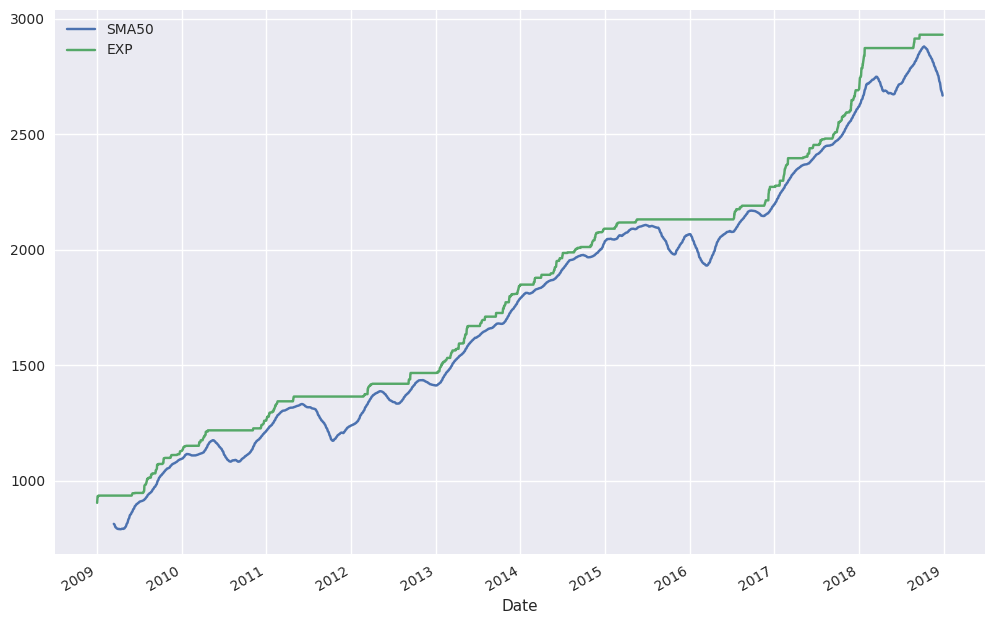

In [172]:
SP500.iloc[:, -2:].plot(figsize = (12, 8))
plt.show()

## Rolling Correlation

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [174]:
stocks = pd.read_csv("data/stocks.csv", header = [0,1], index_col= [0], parse_dates= [0]).Close

In [175]:
stocks.head()

Ticker      AAPL    BA   DIS    IBM    KO  MSFT
Date                                           
2010-01-04  7.64 56.18 32.07 126.63 28.52 30.95
2010-01-05  7.66 58.02 31.99 125.10 28.17 30.96
2010-01-06  7.53 59.78 31.82 124.28 28.17 30.77
2010-01-07  7.52 62.20 31.83 123.85 28.09 30.45
2010-01-08  7.57 61.60 31.88 125.10 27.58 30.66

In [176]:
app_ba = stocks.loc["2009-12-31":"2018", ["AAPL", "BA"]]

In [177]:
app_ba.head()

Ticker      AAPL    BA
Date                  
2010-01-04  7.64 56.18
2010-01-05  7.66 58.02
2010-01-06  7.53 59.78
2010-01-07  7.52 62.20
2010-01-08  7.57 61.60

In [179]:
month_ret = app_ba.resample("ME", kind = "period").last().pct_change().dropna()

/tmp/ipykernel_245409/203873885.py:1: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  month_ret = app_ba.resample("ME", kind = "period").last().pct_change().dropna()


In [180]:
month_ret.head()

Ticker   AAPL    BA
Date               
2010-02  0.07  0.04
2010-03  0.15  0.15
2010-04  0.11 -0.00
2010-05 -0.02 -0.11
2010-06 -0.02 -0.02

In [181]:
month_ret.tail()

Ticker   AAPL    BA
Date               
2018-08  0.20 -0.04
2018-09 -0.01  0.08
2018-10 -0.03 -0.05
2018-11 -0.18 -0.02
2018-12 -0.12 -0.07

In [182]:
month_ret.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 107 entries, 2010-02 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    107 non-null    float64
 1   BA      107 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [183]:
month_ret.corr()

Ticker  AAPL   BA
Ticker           
AAPL    1.00 0.26
BA      0.26 1.00

In [184]:
month_ret.AAPL.rolling(36).corr(month_ret.BA)

Date
2010-02    NaN
2010-03    NaN
2010-04    NaN
2010-05    NaN
2010-06    NaN
          ... 
2018-08   0.13
2018-09   0.11
2018-10   0.10
2018-11   0.13
2018-12   0.17
Freq: M, Length: 107, dtype: float64

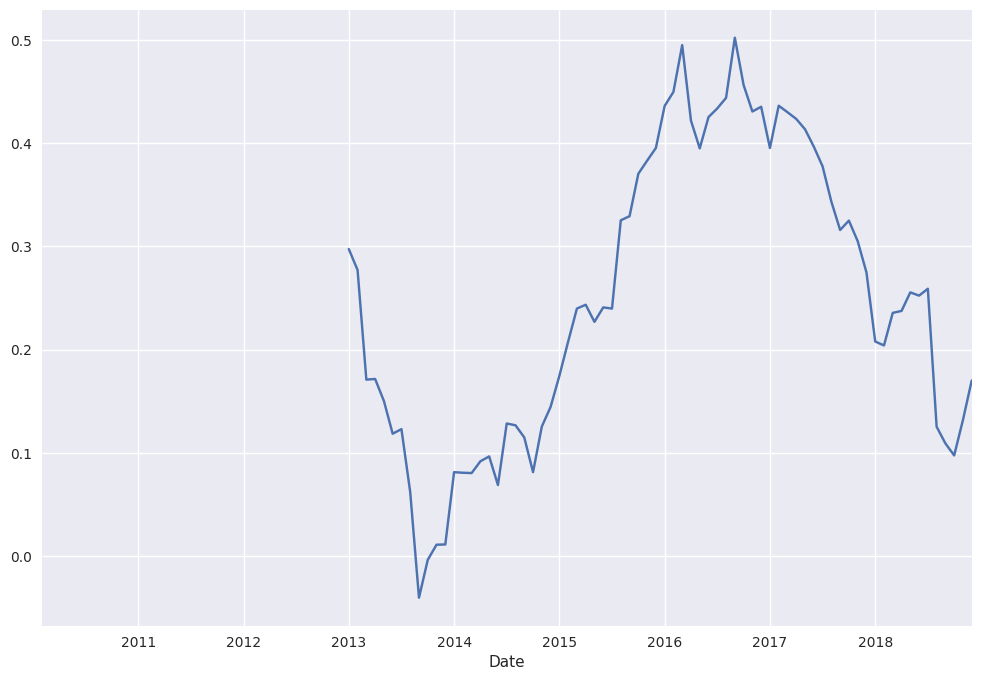

In [185]:
month_ret.AAPL.rolling(36).corr(month_ret.BA).plot(figsize = (12,8))
plt.show()

## rolling() with fixed-sized time offsets

In [186]:
app_ba.head(7)

Ticker      AAPL    BA
Date                  
2010-01-04  7.64 56.18
2010-01-05  7.66 58.02
2010-01-06  7.53 59.78
2010-01-07  7.52 62.20
2010-01-08  7.57 61.60
2010-01-11  7.50 60.87
2010-01-12  7.42 60.43

In [190]:
app_ba.BA.rolling(window = 3).mean()

Date
2010-01-04      NaN
2010-01-05      NaN
2010-01-06    57.99
2010-01-07    60.00
2010-01-08    61.19
              ...  
2018-12-24   303.92
2018-12-26   304.21
2018-12-27   308.41
2018-12-28   315.82
2018-12-31   318.67
Name: BA, Length: 2264, dtype: float64

In [188]:
app_ba.head(7)

Ticker      AAPL    BA
Date                  
2010-01-04  7.64 56.18
2010-01-05  7.66 58.02
2010-01-06  7.53 59.78
2010-01-07  7.52 62.20
2010-01-08  7.57 61.60
2010-01-11  7.50 60.87
2010-01-12  7.42 60.43

In [189]:
app_ba.BA.rolling(window = "3D", min_periods = 3).mean()

Date
2010-01-04      NaN
2010-01-05      NaN
2010-01-06    57.99
2010-01-07    60.00
2010-01-08    61.19
              ...  
2018-12-24      NaN
2018-12-26      NaN
2018-12-27      NaN
2018-12-28   315.82
2018-12-31      NaN
Name: BA, Length: 2264, dtype: float64

### Merging Time Series

In [191]:
import pandas as pd

In [192]:
stocks = pd.read_csv("data/stocks.csv", header = [0,1], index_col= [0], parse_dates= [0]).Close

In [193]:
stocks.head()

Ticker      AAPL    BA   DIS    IBM    KO  MSFT
Date                                           
2010-01-04  7.64 56.18 32.07 126.63 28.52 30.95
2010-01-05  7.66 58.02 31.99 125.10 28.17 30.96
2010-01-06  7.53 59.78 31.82 124.28 28.17 30.77
2010-01-07  7.52 62.20 31.83 123.85 28.09 30.45
2010-01-08  7.57 61.60 31.88 125.10 27.58 30.66

In [194]:
aapl = stocks.loc["2010-01-01" : "2014-12-31", "AAPL"].to_frame()
aapl.head()

AAPL
Date            
2010-01-04  7.64
2010-01-05  7.66
2010-01-06  7.53
2010-01-07  7.52
2010-01-08  7.57

In [195]:
ba = stocks.loc["2012-01-01" : "2016-12-31", "BA"].to_frame()
ba.head()

BA
Date            
2012-01-03 74.22
2012-01-04 74.33
2012-01-05 73.53
2012-01-06 73.98
2012-01-09 74.53

In [197]:
aapl["BA"] = ba.BA

In [198]:
aapl.head()

AAPL  BA
Date                
2010-01-04  7.64 NaN
2010-01-05  7.66 NaN
2010-01-06  7.53 NaN
2010-01-07  7.52 NaN
2010-01-08  7.57 NaN

In [199]:
aapl.tail()

AAPL     BA
Date                   
2014-12-24 28.00 131.24
2014-12-26 28.50 131.63
2014-12-29 28.48 132.29
2014-12-30 28.13 131.83
2014-12-31 27.59 129.98

In [200]:
aapl.dropna()

AAPL     BA
Date                   
2012-01-03 14.69  74.22
2012-01-04 14.77  74.33
2012-01-05 14.93  73.53
2012-01-06 15.09  73.98
2012-01-09 15.06  74.53
...          ...    ...
2014-12-24 28.00 131.24
2014-12-26 28.50 131.63
2014-12-29 28.48 132.29
2014-12-30 28.13 131.83
2014-12-31 27.59 129.98

[754 rows x 2 columns]

In [201]:
ba.reindex(aapl.index).dropna()

BA
Date             
2012-01-03  74.22
2012-01-04  74.33
2012-01-05  73.53
2012-01-06  73.98
2012-01-09  74.53
...           ...
2014-12-24 131.24
2014-12-26 131.63
2014-12-29 132.29
2014-12-30 131.83
2014-12-31 129.98

[754 rows x 1 columns]

In [202]:
dis = stocks.loc["2010-01-01" : "2016-12-31", "DIS"].resample("W-Fri").last().to_frame()
dis.head()

DIS
Date            
2010-01-08 31.88
2010-01-15 30.60
2010-01-22 29.98
2010-01-29 29.55
2010-02-05 29.54

In [203]:
aapl.head()

AAPL  BA
Date                
2010-01-04  7.64 NaN
2010-01-05  7.66 NaN
2010-01-06  7.53 NaN
2010-01-07  7.52 NaN
2010-01-08  7.57 NaN

In [204]:
aapl["DIS"] = dis.DIS

In [205]:
aapl.head(10)

AAPL  BA   DIS
Date                      
2010-01-04  7.64 NaN   NaN
2010-01-05  7.66 NaN   NaN
2010-01-06  7.53 NaN   NaN
2010-01-07  7.52 NaN   NaN
2010-01-08  7.57 NaN 31.88
2010-01-11  7.50 NaN   NaN
2010-01-12  7.42 NaN   NaN
2010-01-13  7.52 NaN   NaN
2010-01-14  7.48 NaN   NaN
2010-01-15  7.35 NaN 30.60

In [206]:
dis.reindex(aapl.index)

DIS
Date            
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08 31.88
...          ...
2014-12-24   NaN
2014-12-26 95.03
2014-12-29   NaN
2014-12-30   NaN
2014-12-31   NaN

[1258 rows x 1 columns]

In [207]:
dis["AAPL"] = aapl.AAPL

In [208]:
dis.head(10)

DIS  AAPL
Date                  
2010-01-08 31.88  7.57
2010-01-15 30.60  7.35
2010-01-22 29.98  7.06
2010-01-29 29.55  6.86
2010-02-05 29.54  6.98
2010-02-12 30.07  7.16
2010-02-19 31.23  7.20
2010-02-26 31.24  7.31
2010-03-05 33.22  7.82
2010-03-12 33.69  8.09